## 均一な水ファントムにペンシルビームを照射した

均一な水ファントムに2つの方向からビームを入射し角度を推論することに挑戦した。

結果として、$\theta, \phi$を推論することができたが二つの組み合わせを判定することができなかった。

変更する角度を$\theta$のみにする。

つまり、人体の周囲の円環状に線源を配置する。

<img src = "img_ray_direc.jpg">

## 変更点

今までは、水ファントムの表面から角度を決めていた。しかし、実際の治療では水ファントムの中心に線量が付与される場合が考えられる。

<img src = "img_ray_water.jpg">

粒子を照射する方向を修正することとする。

修正し、$0\leq\theta< 2\pi $の範囲で計算したデータがdata_06

学習に使用するのは、5度刻みとする。

## 1方向での推論

1方向での推論を行ってきたが、照射する位置が異なるため、この場合でも照射位置が合っているか検証する

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Allocation GPU hardware ID = 0
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(physical_devices[1], 'GPU')

In [3]:
dir_name = "data_06" 
theta_s = [5 * i for i in range(72)]
phi = 0

file_names = [str(dir_name)+"/"+str(theta)+","+str(phi)+".csv" for theta in theta_s]

data = [np.array(pd.read_csv(file_name)['dose']).reshape(61,61,150) for file_name in file_names]

data = np.array(data).astype("float32")
data = np.expand_dims(data, axis=4)

label = [theta for theta in theta_s ]

In [4]:
x_train = data

t_train = np.zeros((len(label),360))
for j in range(len(label)):
        t_train[j][label[j]] = 1

In [5]:
#Input shape の定義
inp_shape = (61, 61, 150, 1)
inputs = tf.keras.Input(shape = inp_shape)

# x = layer()(x)の形で層を定義していく
x = tf.keras.layers.Conv3D(16, 2, activation = 'relu', strides = 2, name = "conv3d_1")(inputs)
x = tf.keras.layers.BatchNormalization(name = "normalize_1")(x)

x = tf.keras.layers.Conv3D(32, 2, activation = 'relu', strides = 2, name = "conv3d_2")(x)
x = tf.keras.layers.BatchNormalization(name = "normalize_2")(x)

x = tf.keras.layers.Conv3D(64, 2, activation = 'relu', strides = 2, name = "conv3d_3")(x)

x = tf.keras.layers.Flatten(name = "flatten")(x)

# 出力層を複数にする場合は、出力層 = layer()(中間層)の形にする。
theta = tf.keras.layers.Dense(360, activation='softmax', name = "theta")(x)
# phi = tf.keras.layers.Dense(91, activation='softmax'  , name = "phi"  )(x)

#ここで、modelのinputとoutputを定義する
model = tf.keras.Model(inputs=inputs, outputs= theta)

#出力層ごとにoptimizerやlossを変更できるが、全て同じで良い場合はひとつ設定すれば良い
model.compile(loss      = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(0.2))

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 61, 61, 150, 1)]  0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 30, 30, 75, 16)    144       
_________________________________________________________________
normalize_1 (BatchNormalizat (None, 30, 30, 75, 16)    64        
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 15, 15, 37, 32)    4128      
_________________________________________________________________
normalize_2 (BatchNormalizat (None, 15, 15, 37, 32)    128       
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 7, 7, 18, 64)      16448     
_________________________________________________________________
flatten (Flatten)            (None, 56448)             0     

2023-01-25 17:42:49.635222: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 17:42:49.639697: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2023-01-25 17:42:49.639752: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-01-25 17:42:49.639796: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-01-25 17:42:49.639826: I tensorflow/stream_executor/platform/

In [7]:
model.fit(x = x_train, y = t_train,
          batch_size = 1400,
          epochs     = 900)

Epoch 1/900
1/1 [==============================] - 0s 229ms/step - loss: 0.0023
Epoch 2/900
1/1 [==============================] - 0s 163ms/step - loss: 0.0023
Epoch 3/900
1/1 [==============================] - 0s 135ms/step - loss: 0.0023
Epoch 4/900
1/1 [==============================] - 0s 135ms/step - loss: 0.0023
Epoch 5/900
1/1 [==============================] - 0s 135ms/step - loss: 0.0023
Epoch 6/900
1/1 [==============================] - 0s 134ms/step - loss: 0.0023
Epoch 7/900
1/1 [==============================] - 0s 134ms/step - loss: 0.0023
Epoch 8/900
1/1 [==============================] - 0s 135ms/step - loss: 0.0023
Epoch 9/900
1/1 [==============================] - 0s 135ms/step - loss: 0.0023
Epoch 10/900
1/1 [==============================] - 0s 134ms/step - loss: 0.0023
Epoch 11/900
1/1 [==============================] - 0s 134ms/step - loss: 0.0023
Epoch 12/900
1/1 [==============================] - 0s 135ms/step - loss: 0.0023
Epoch 13/900
1/1 [===================

KeyboardInterrupt: 

lossの値が$10^{-5}$程度になっている。

推論の精度について調べる

全ての範囲で精度を検証するのは時間がかかるので、今回は、$0\leq \theta < 180$までの範囲で調べる

In [17]:
dir_name = "data_06" 
theta_s = [i for i in range(180)]
phi = 0

file_names = [str(dir_name)+"/"+str(theta)+","+str(phi)+".csv" for theta in theta_s]

data = [np.array(pd.read_csv(file_name)['dose']).reshape(61,61,150) for file_name in file_names]

data = np.array(data).astype("float32")
data = np.expand_dims(data, axis=4)

x_test = data

t_test = np.array([theta for theta in range(180) ])

In [9]:
t_pred = model.predict(x_test)

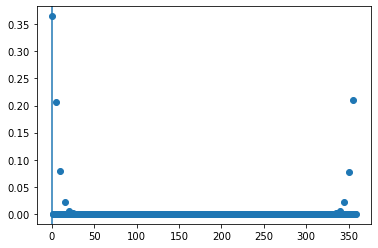

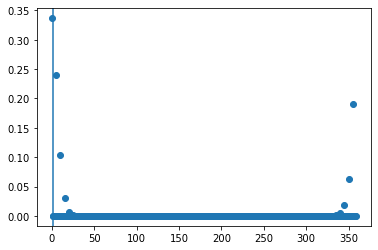

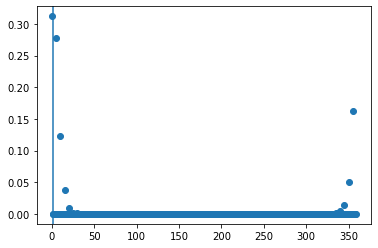

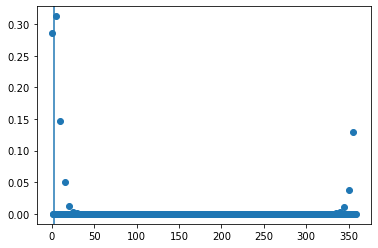

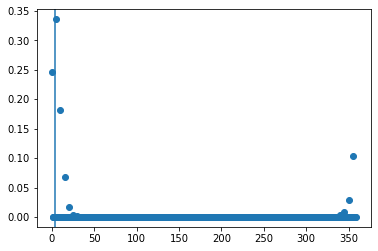

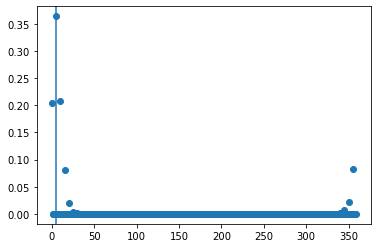

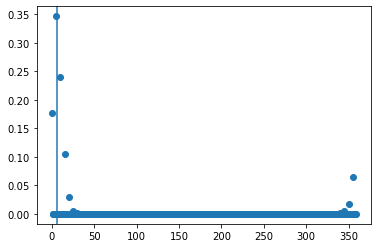

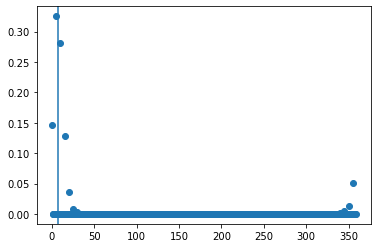

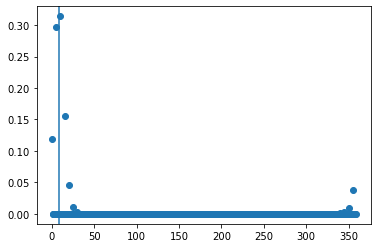

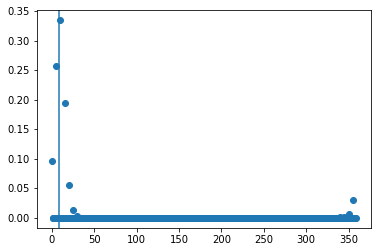

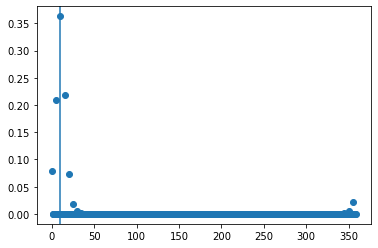

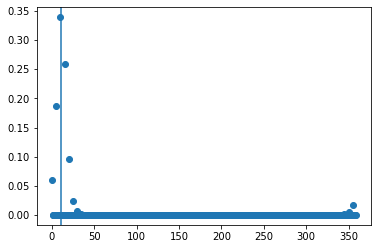

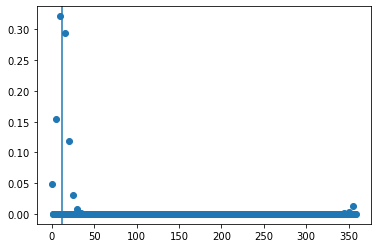

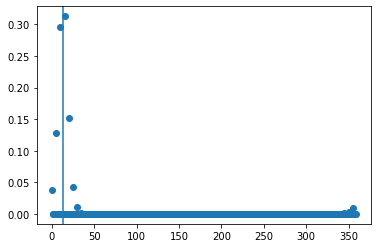

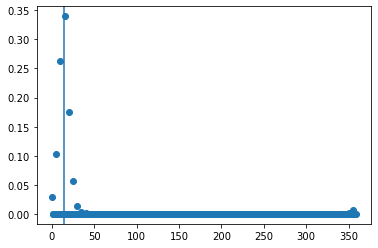

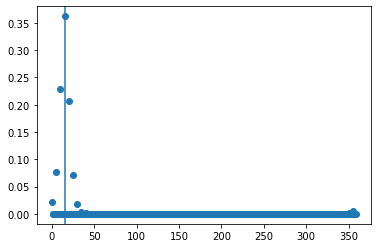

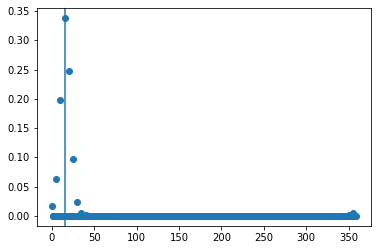

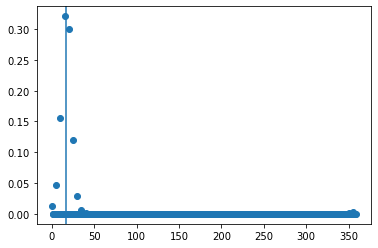

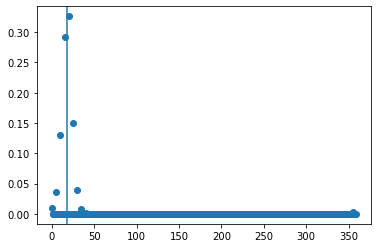

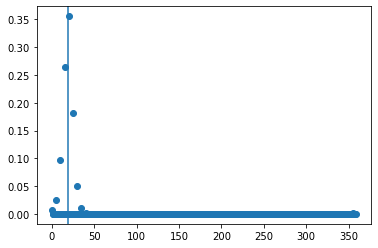

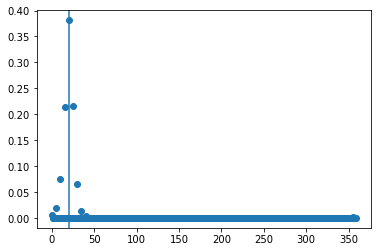

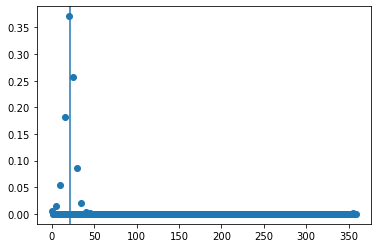

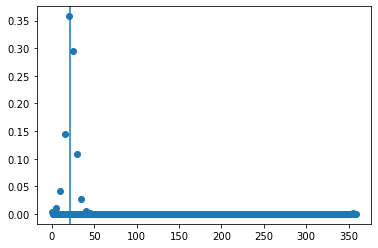

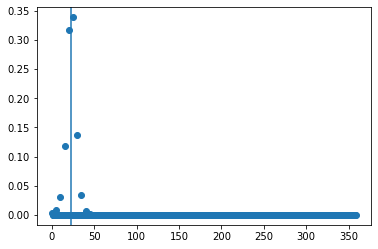

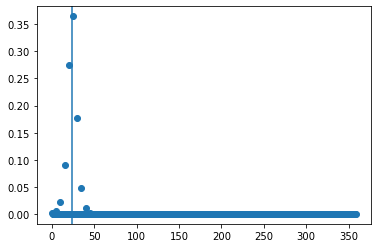

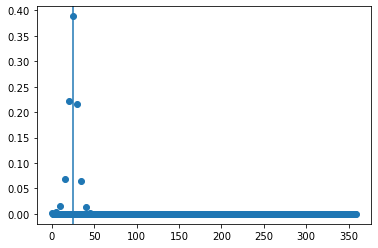

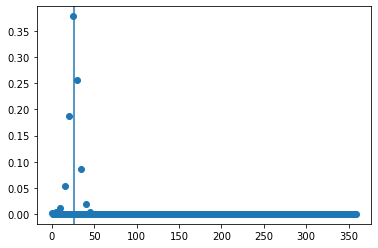

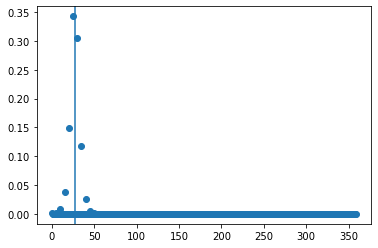

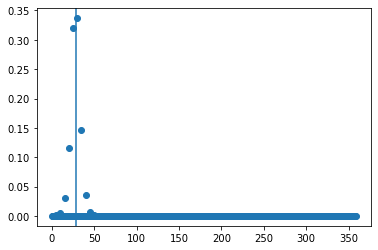

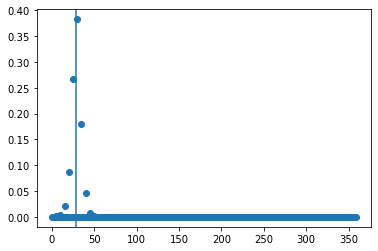

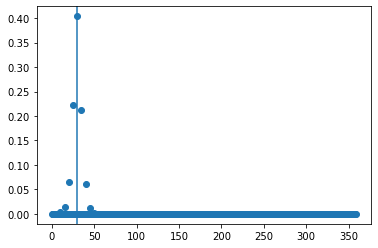

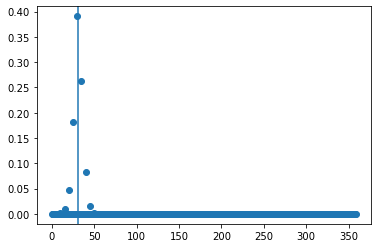

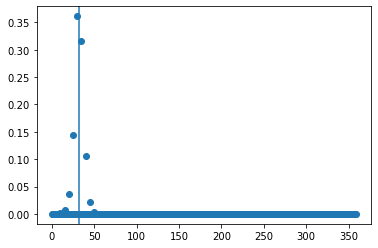

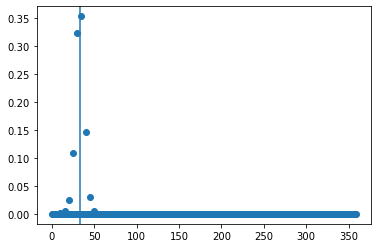

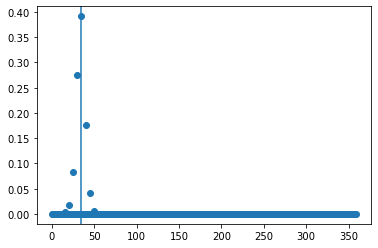

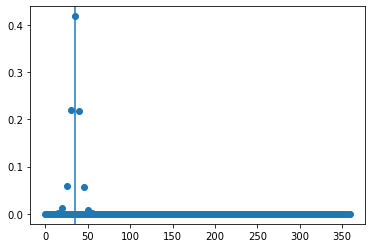

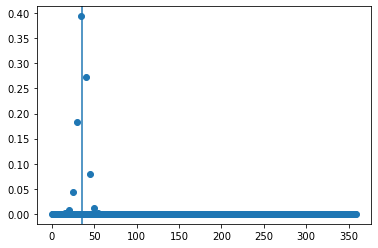

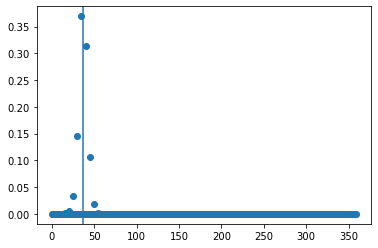

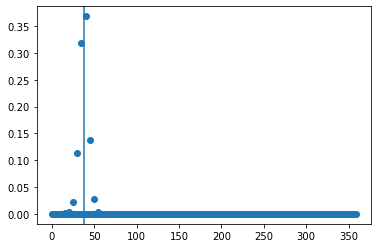

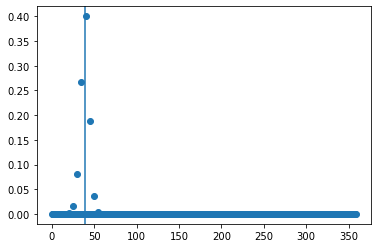

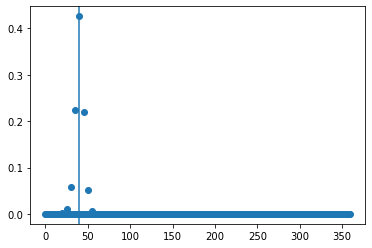

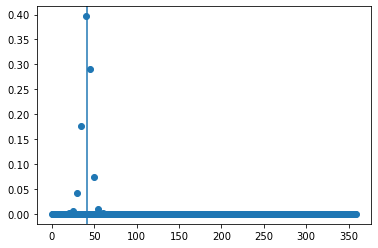

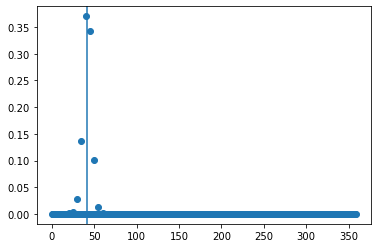

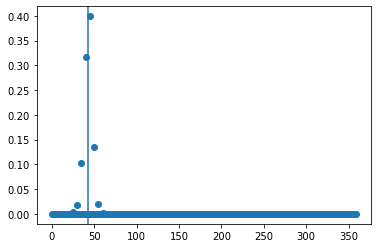

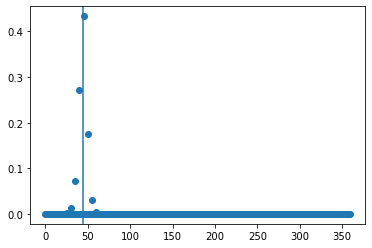

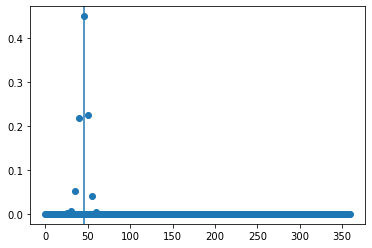

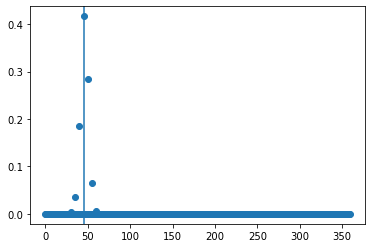

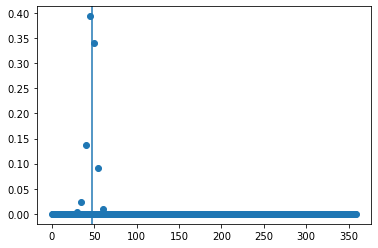

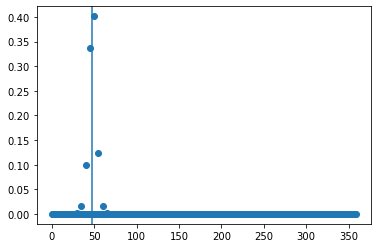

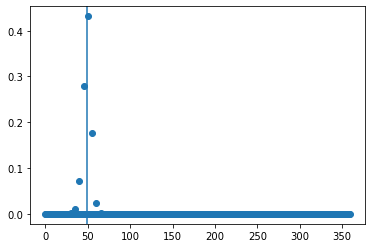

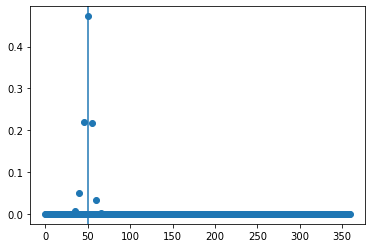

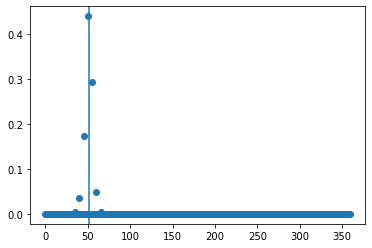

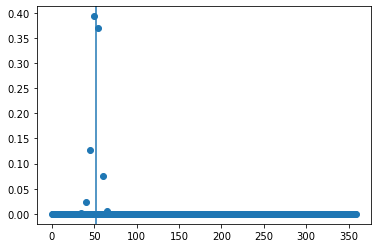

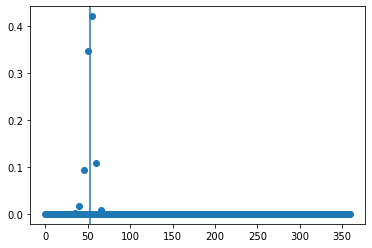

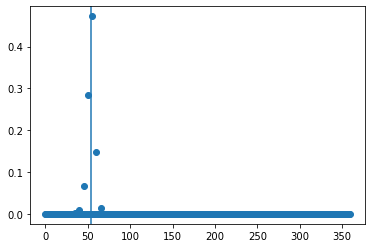

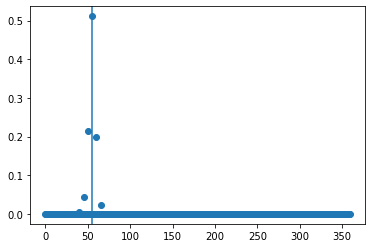

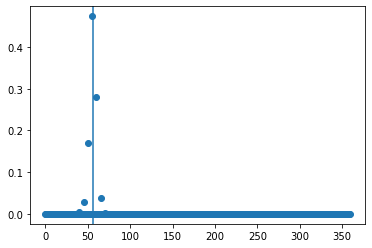

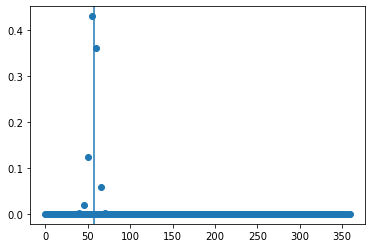

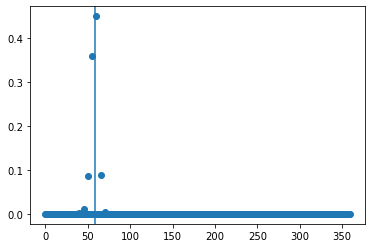

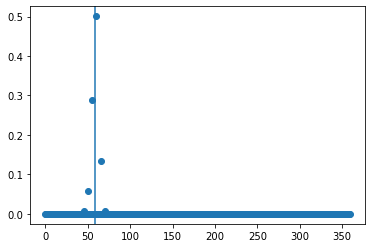

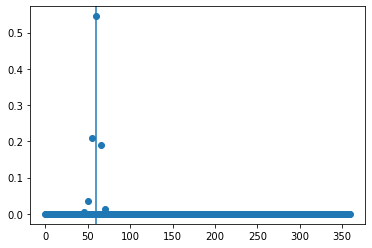

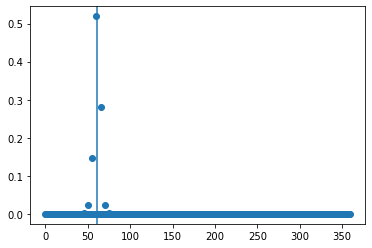

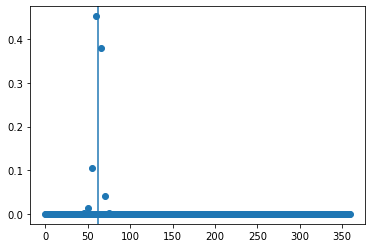

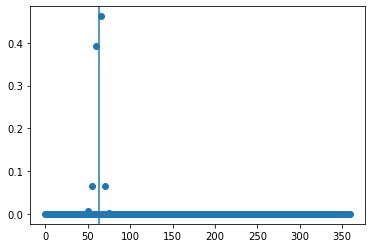

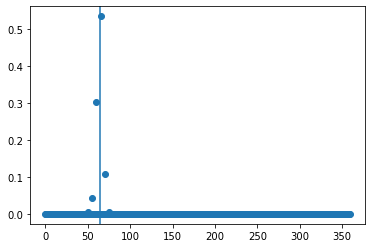

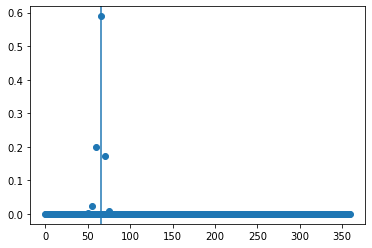

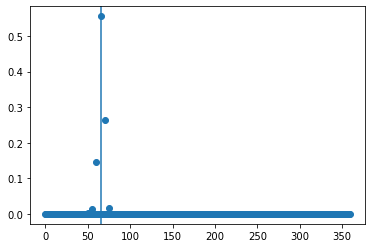

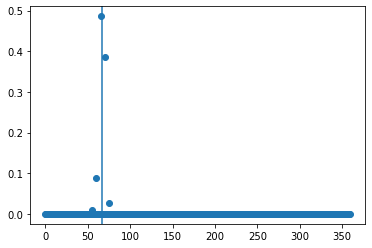

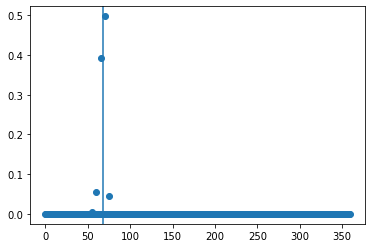

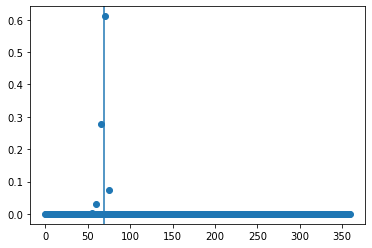

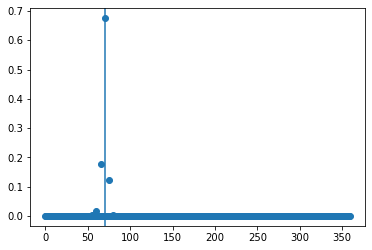

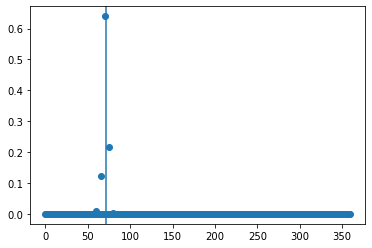

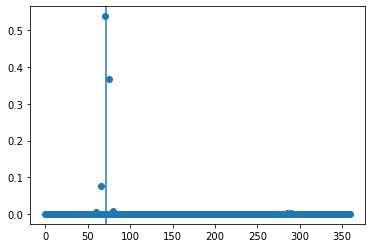

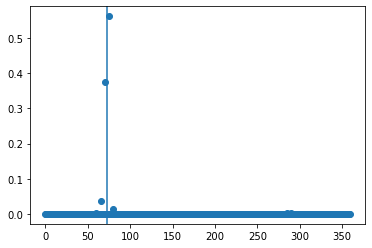

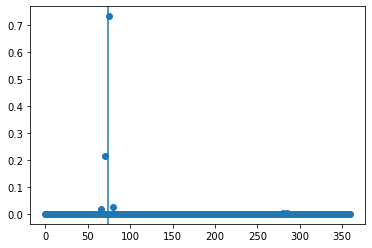

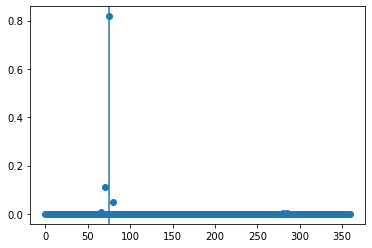

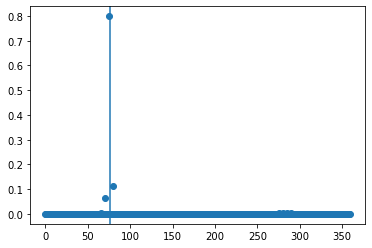

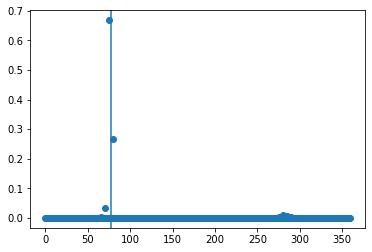

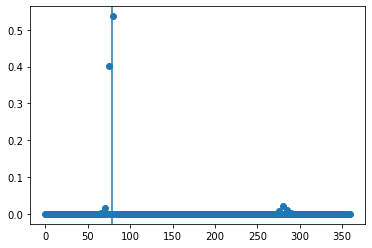

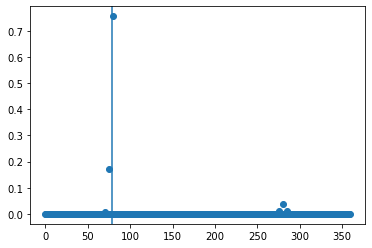

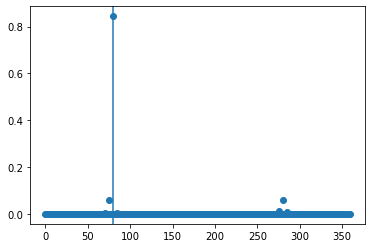

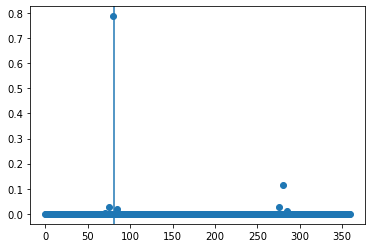

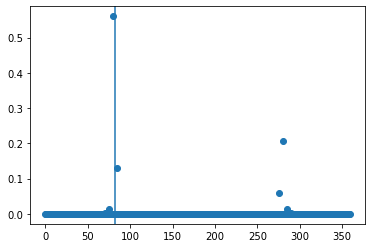

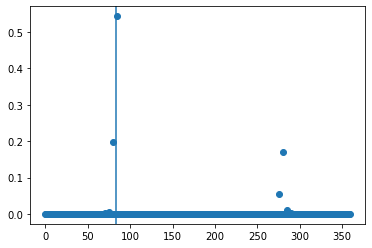

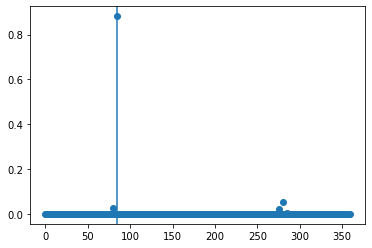

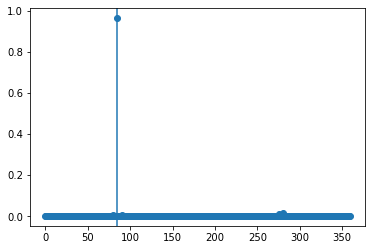

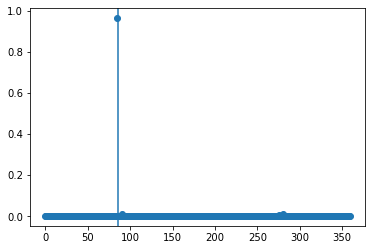

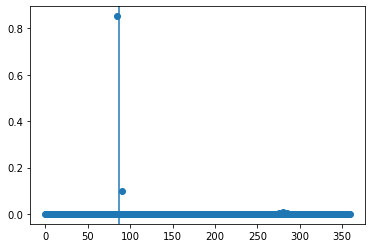

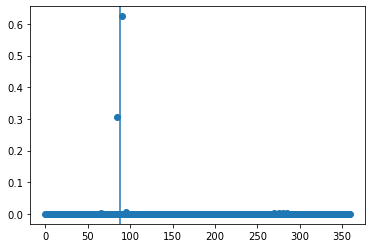

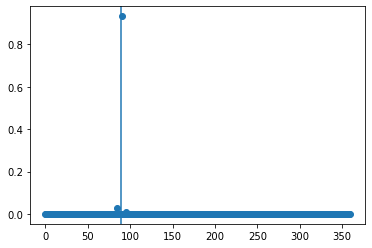

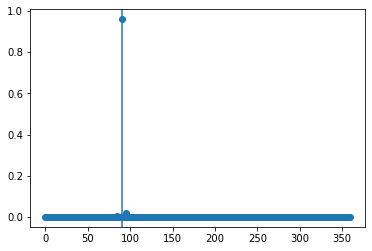

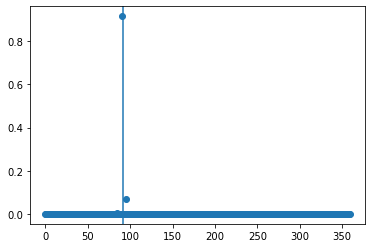

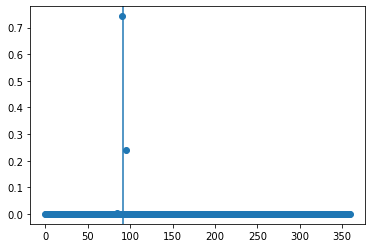

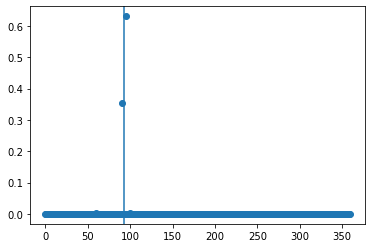

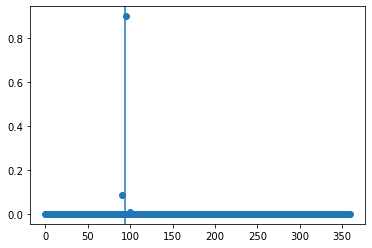

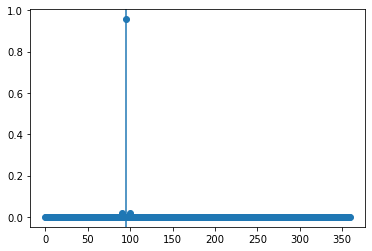

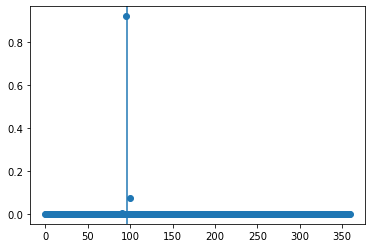

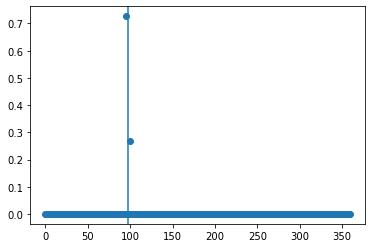

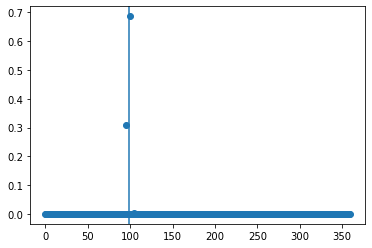

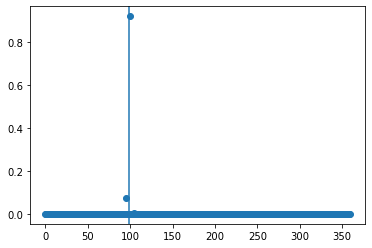

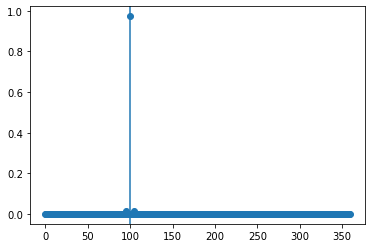

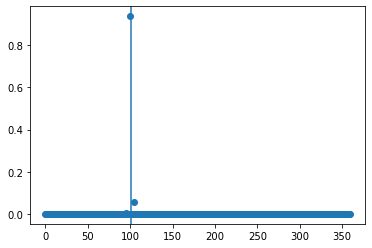

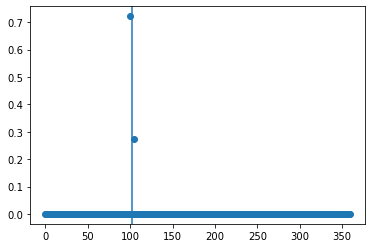

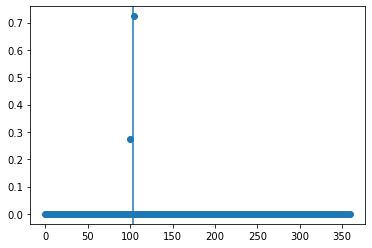

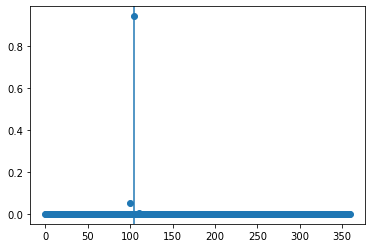

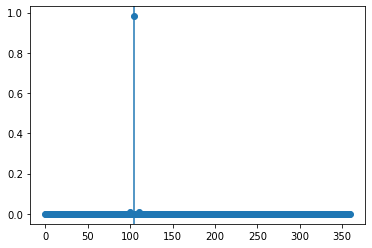

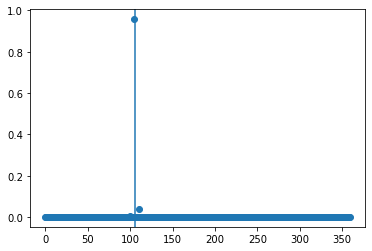

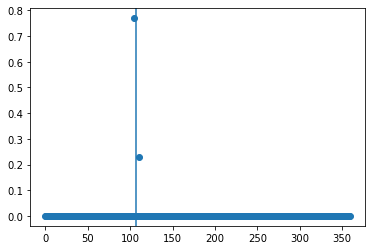

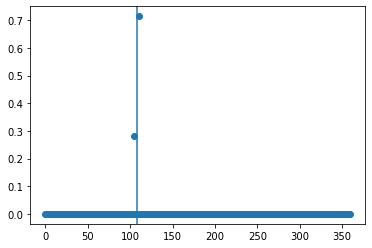

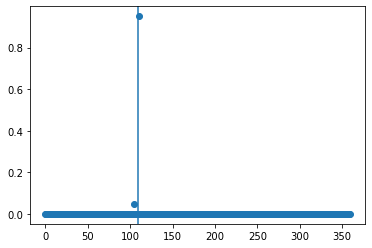

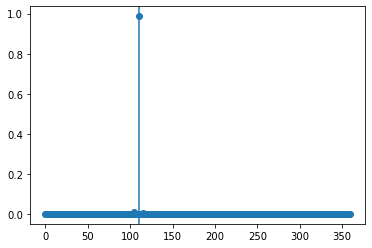

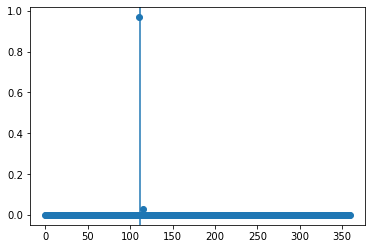

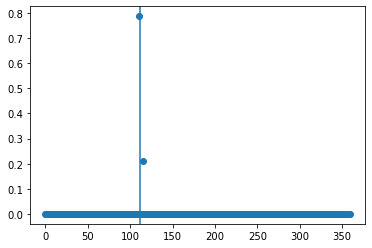

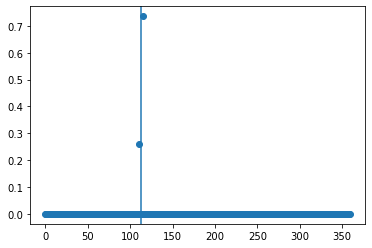

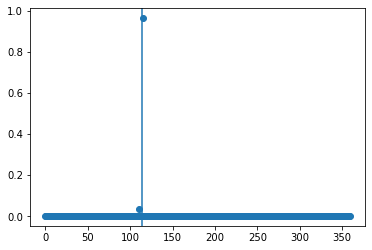

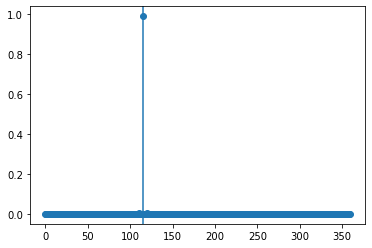

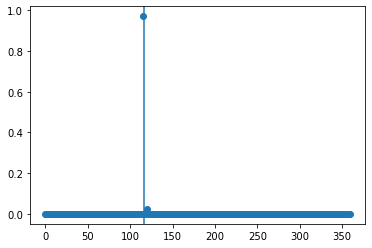

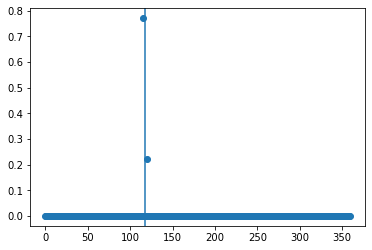

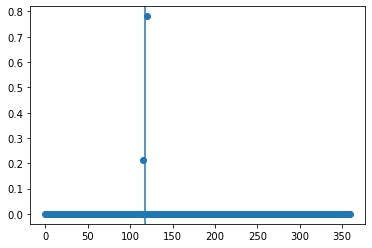

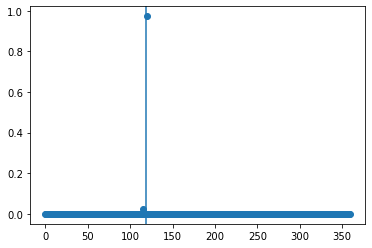

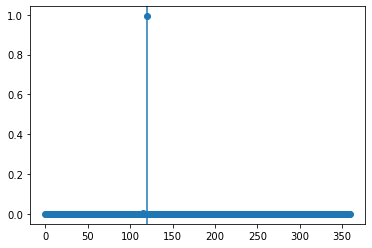

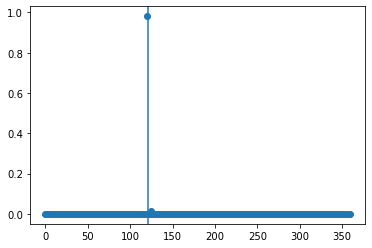

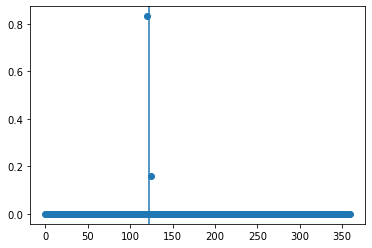

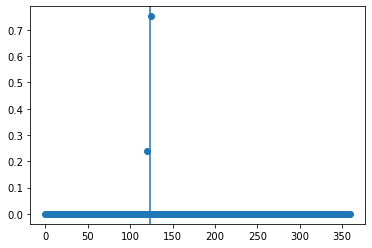

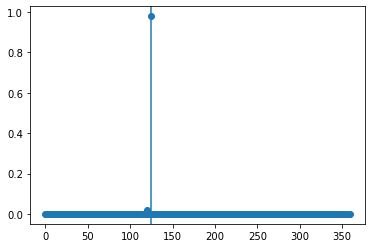

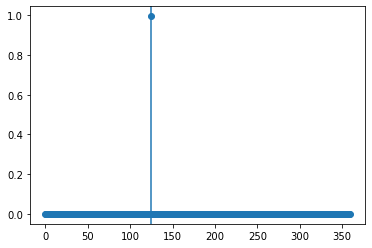

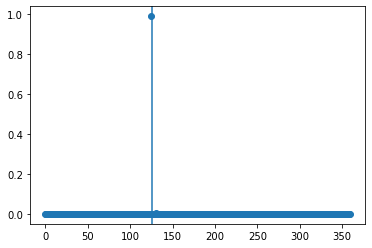

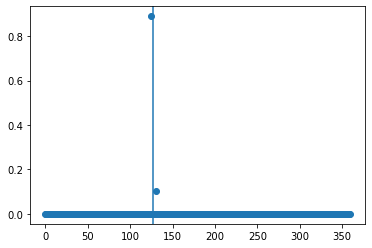

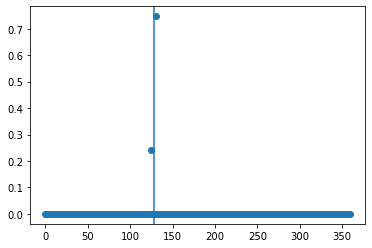

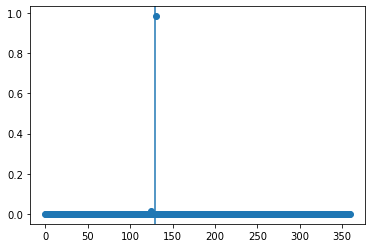

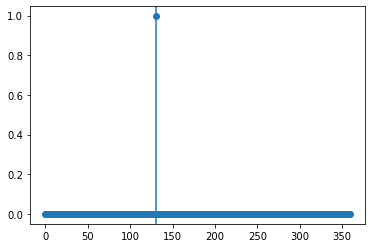

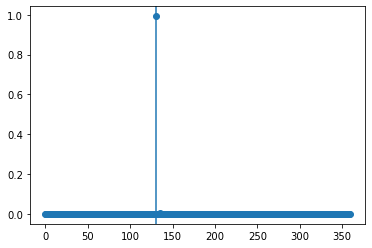

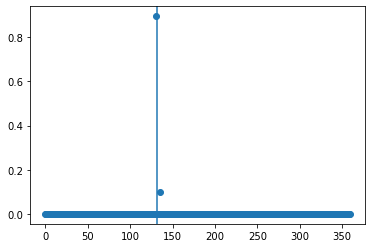

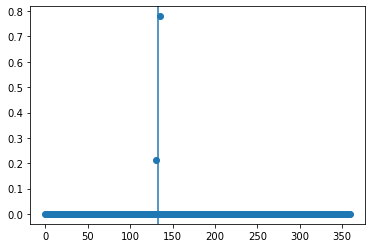

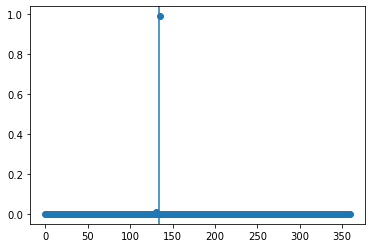

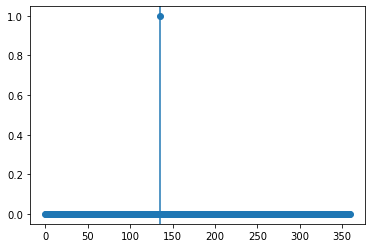

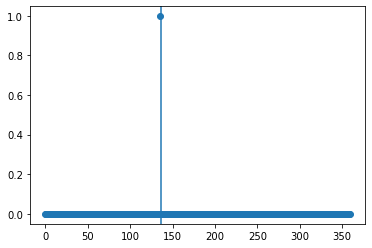

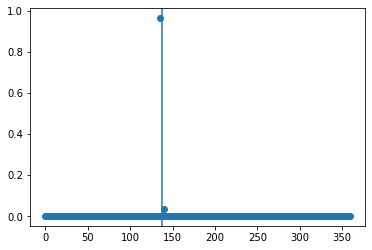

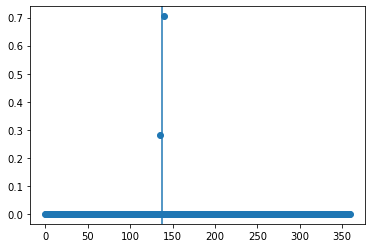

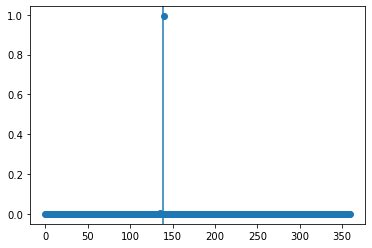

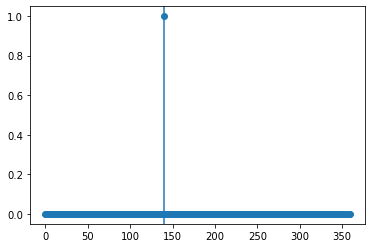

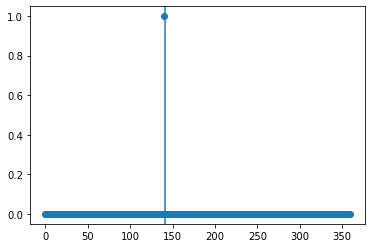

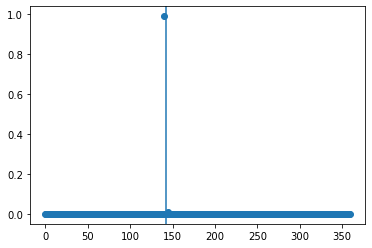

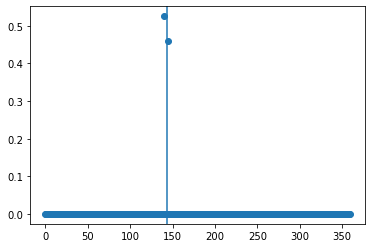

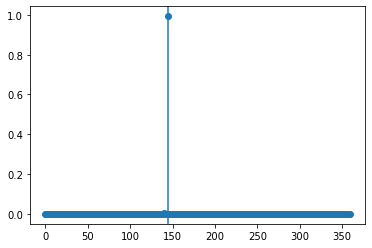

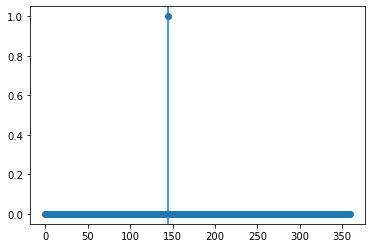

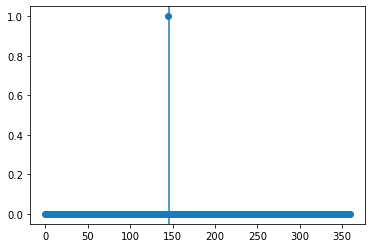

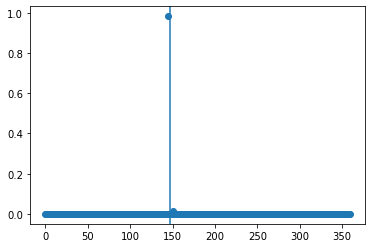

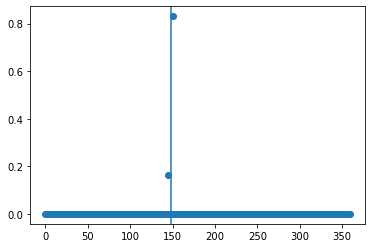

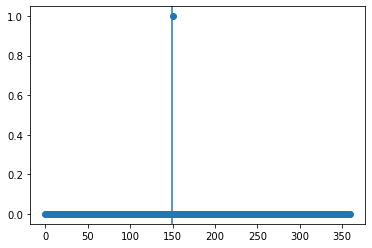

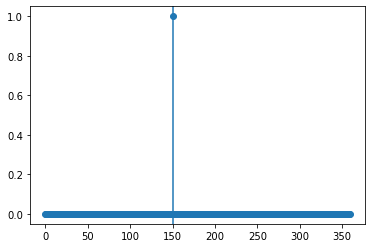

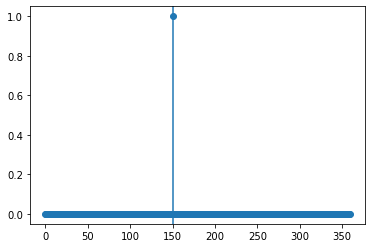

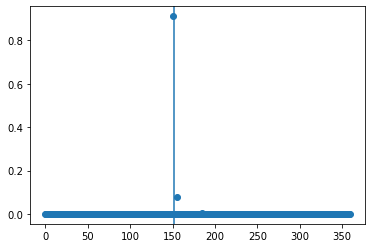

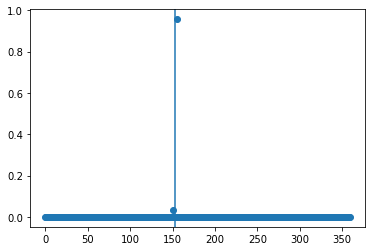

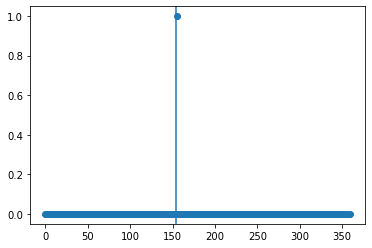

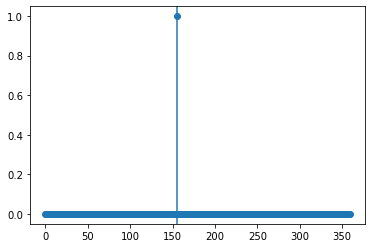

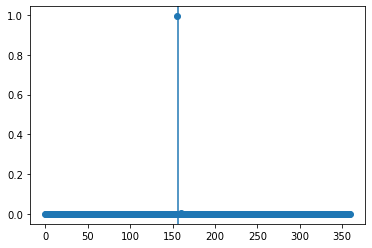

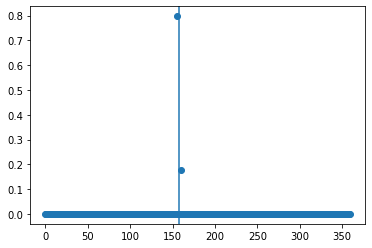

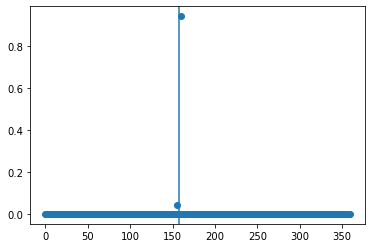

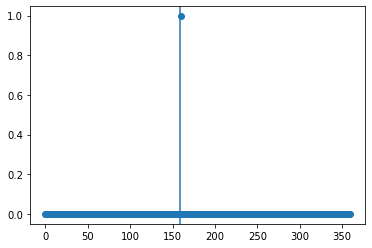

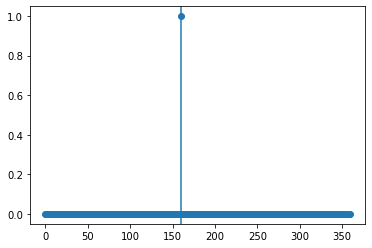

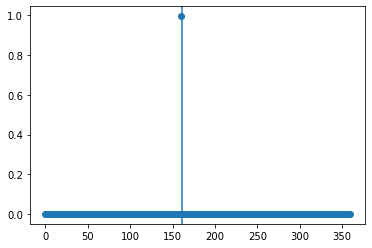

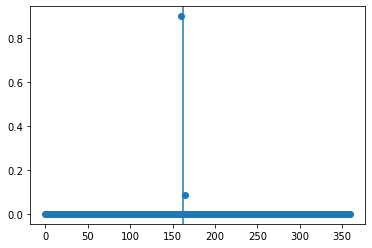

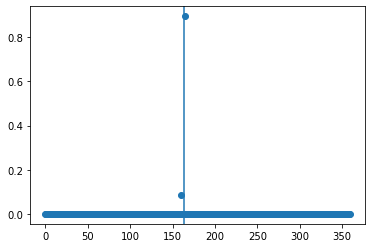

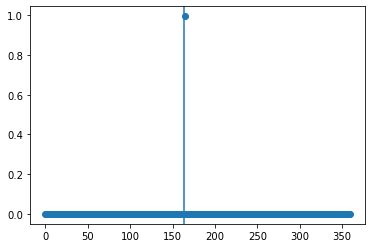

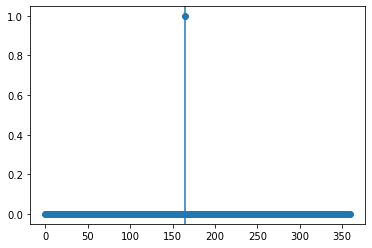

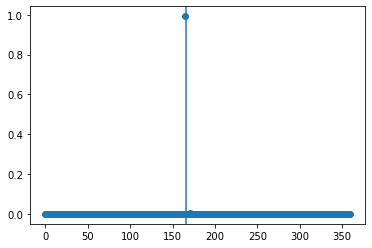

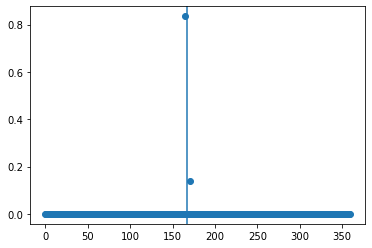

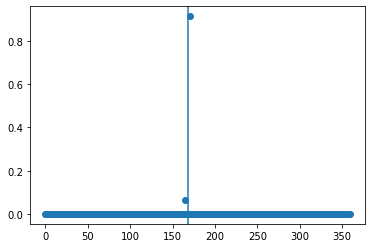

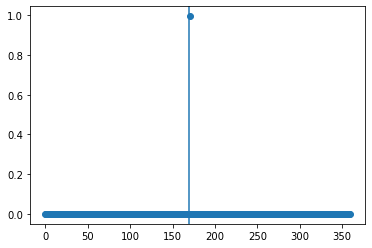

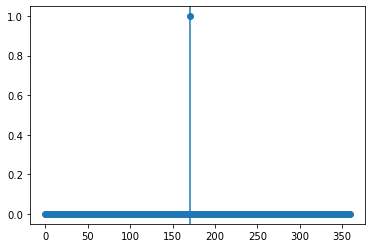

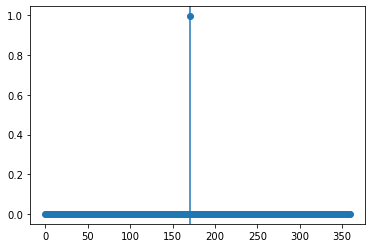

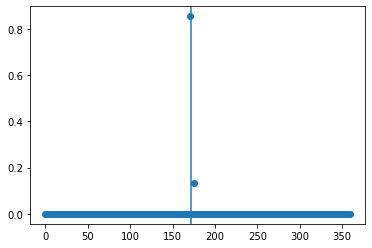

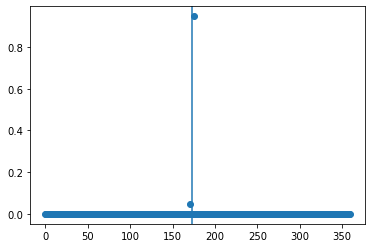

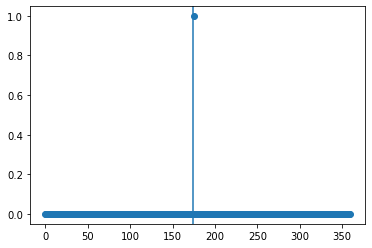

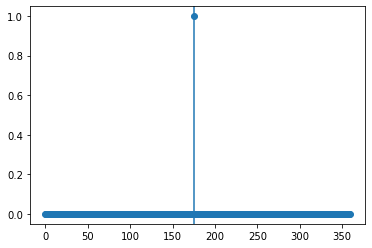

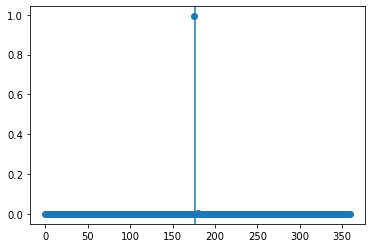

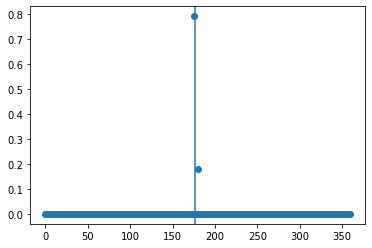

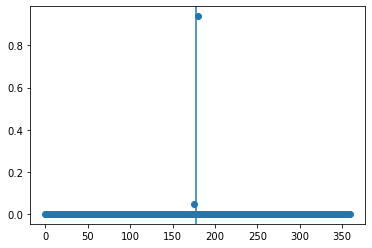

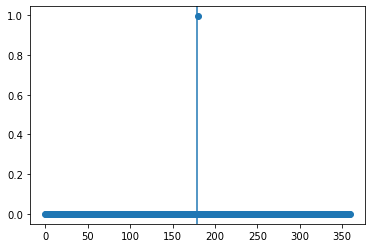

In [16]:
t = [i for i in range(360)]

for i in range(180):
    plt.scatter(t,t_pred[i])
    plt.axvline(t_test[i])
    plt.show()
    plt.close()

In [18]:
diff = [np.argmax(t_pred[i]) - t_test[i] for i in range(180)]

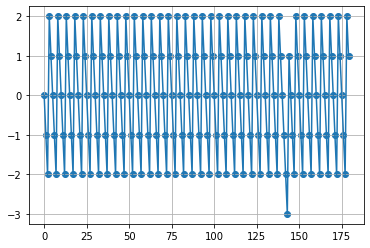

In [24]:
t = [i for i in range(180)]
plt.scatter(t,diff)
plt.plot(t,diff)
plt.grid()

正解との誤差はほとんどの場合で2度以下に収まっている。

## 2方向の推論

In [75]:
#Input shape の定義
inp_shape = (61, 61, 150, 1)
inputs = tf.keras.Input(shape = inp_shape)

# x = layer()(x)の形で層を定義していく
x = tf.keras.layers.Conv3D(16, 2, activation = 'relu', strides = 2, name = "conv3d_1")(inputs)
x = tf.keras.layers.BatchNormalization(name = "normalize_1")(x)

x = tf.keras.layers.Conv3D(32, 2, activation = 'relu', strides = 2, name = "conv3d_2")(x)
x = tf.keras.layers.BatchNormalization(name = "normalize_2")(x)

x = tf.keras.layers.Conv3D(64, 2, activation = 'relu', strides = 2, name = "conv3d_3")(x)

x = tf.keras.layers.Flatten(name = "flatten")(x)

# 出力層を複数にする場合は、出力層 = layer()(中間層)の形にする。
theta = tf.keras.layers.Dense(360, activation='softmax', name = "theta")(x)
# phi = tf.keras.layers.Dense(91, activation='softmax'  , name = "phi"  )(x)

#ここで、modelのinputとoutputを定義する
model = tf.keras.Model(inputs=inputs, outputs= theta)

#出力層ごとにoptimizerやlossを変更できるが、全て同じで良い場合はひとつ設定すれば良い
model.compile(loss      = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(0.2))

model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 61, 61, 150, 1)]  0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 30, 30, 75, 16)    144       
_________________________________________________________________
normalize_1 (BatchNormalizat (None, 30, 30, 75, 16)    64        
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 15, 15, 37, 32)    4128      
_________________________________________________________________
normalize_2 (BatchNormalizat (None, 15, 15, 37, 32)    128       
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 7, 7, 18, 64)      16448     
_________________________________________________________________
flatten (Flatten)            (None, 56448)             0   

In [76]:
dir_name = "data_06" 
theta_s = [5 * i for i in range(72)]
phi = 0

file_names = [str(dir_name)+"/"+str(theta)+","+str(phi)+".csv" for theta in theta_s]

data = [np.array(pd.read_csv(file_name)['dose']).reshape(61,61,150) for file_name in file_names]

data = np.array(data).astype("float32")
data = np.expand_dims(data, axis=4)

label = np.zeros((72,360))
for j in range(72):
    label[j][5 * j] = 0.5

In [77]:
for nums in range(100):
    itr = np.random.randint(0, len(data), [128,2])
    
    x_train = np.array([data[i[0]] + data[i[1]] for i in itr])
    
    t_train = np.array([label[i[0]] + label[i[1]] for i in itr])

    model.fit(x = x_train, y = t_train,
          batch_size = 2**13,
          epochs     = 20)
    print(nums)

Epoch 1/20
1/1 [==============================] - 1s 984ms/step - loss: 0.7679
Epoch 2/20
1/1 [==============================] - 0s 229ms/step - loss: 0.2755
Epoch 3/20
1/1 [==============================] - 0s 303ms/step - loss: 0.1537
Epoch 4/20
1/1 [==============================] - 0s 225ms/step - loss: 0.1028
Epoch 5/20
1/1 [==============================] - 0s 222ms/step - loss: 0.0767
Epoch 6/20
1/1 [==============================] - 0s 224ms/step - loss: 0.0613
Epoch 7/20
1/1 [==============================] - 0s 225ms/step - loss: 0.0513
Epoch 8/20
1/1 [==============================] - 0s 277ms/step - loss: 0.0443
Epoch 9/20
1/1 [==============================] - 0s 224ms/step - loss: 0.0393
Epoch 10/20
1/1 [==============================] - 0s 223ms/step - loss: 0.0354
Epoch 11/20
1/1 [==============================] - 0s 226ms/step - loss: 0.0325
Epoch 12/20
1/1 [==============================] - 0s 223ms/step - loss: 0.0301
Epoch 13/20
1/1 [==============================] 

model.save("two_theta")

In [78]:
itr = np.random.randint(0, len(data), [100,2])

x_test = np.array([data[i[0]] + data[i[1]] for i in itr])

t_test = np.array([label[i[0]] + label[i[1]] for i in itr])    

In [79]:
t_pred = model.predict(x_test)

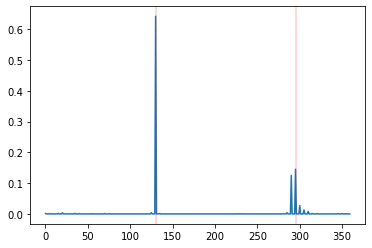

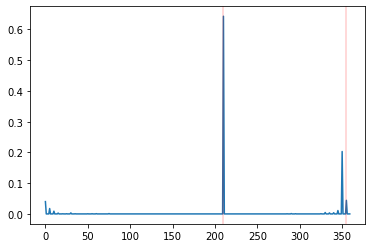

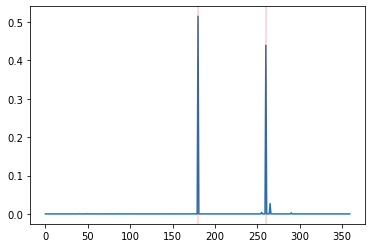

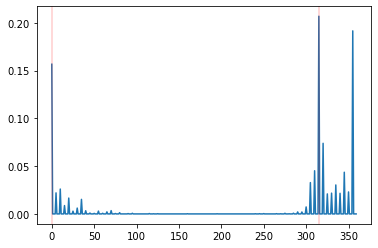

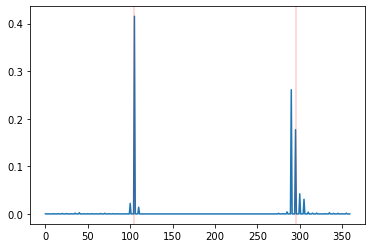

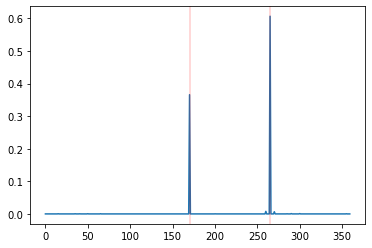

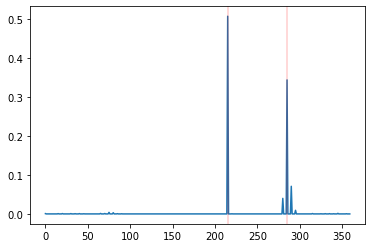

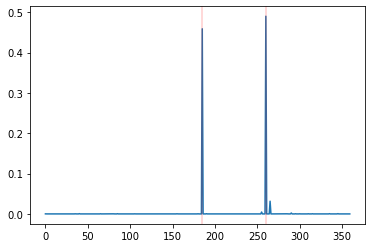

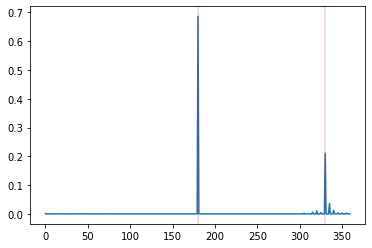

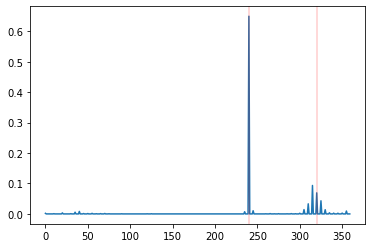

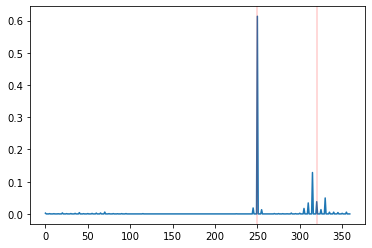

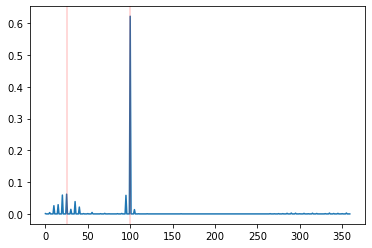

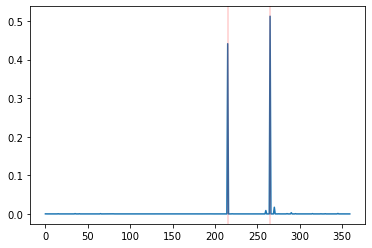

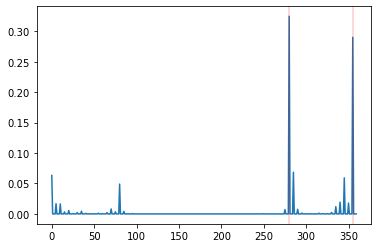

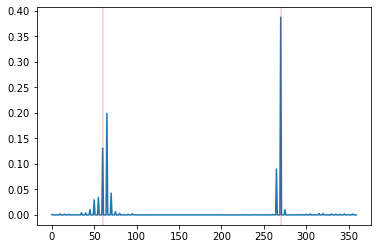

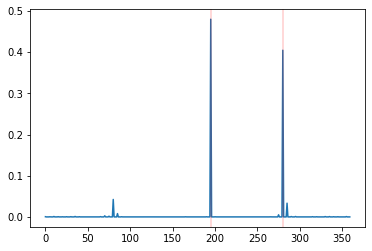

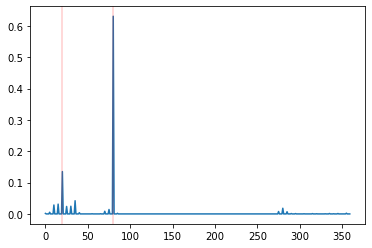

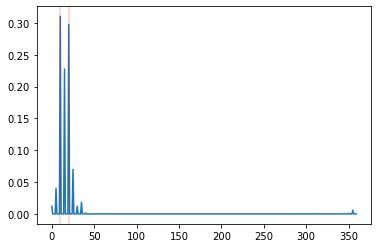

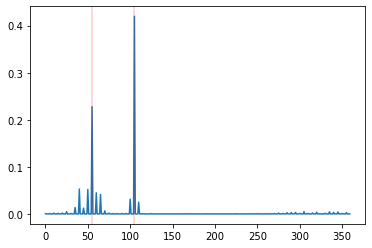

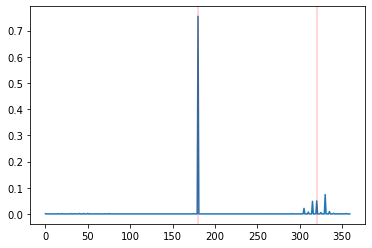

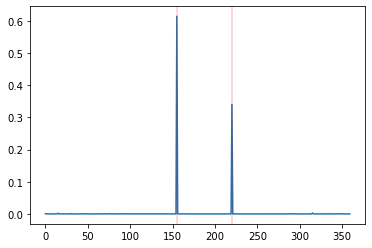

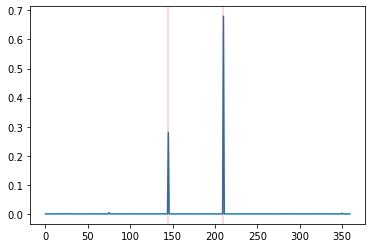

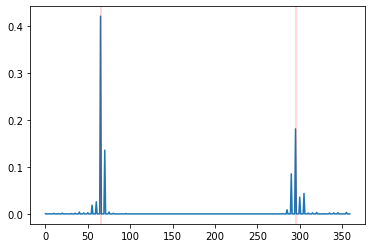

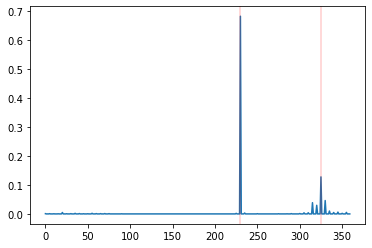

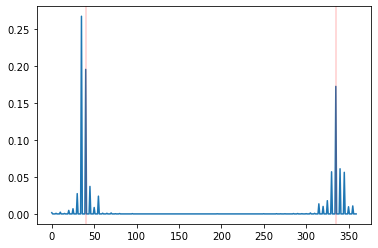

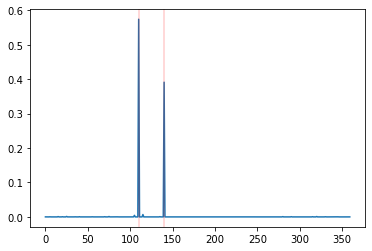

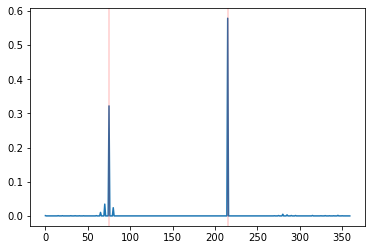

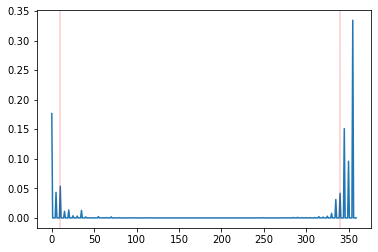

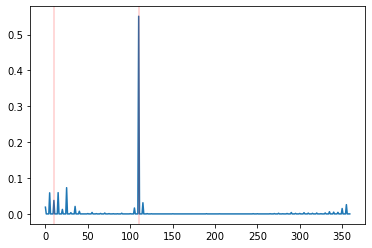

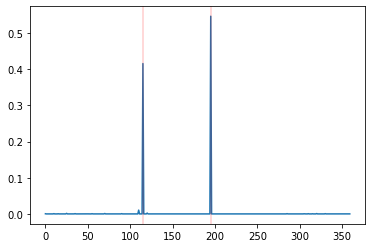

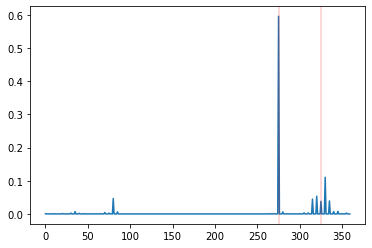

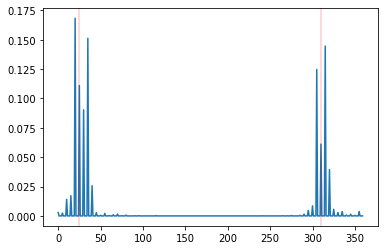

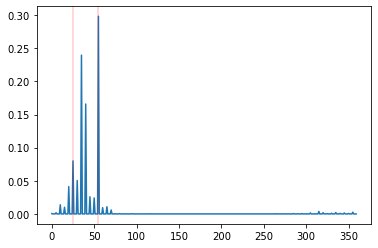

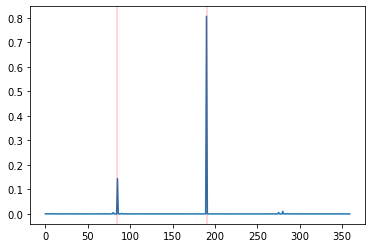

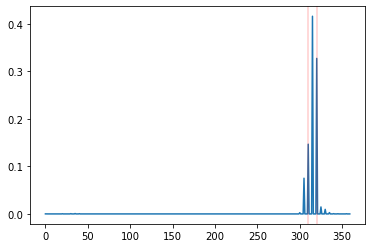

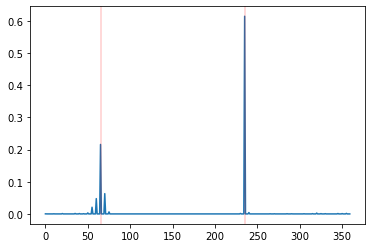

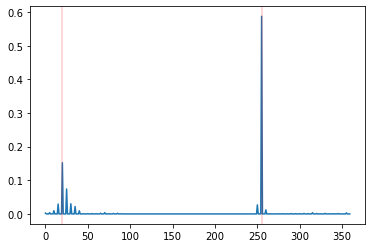

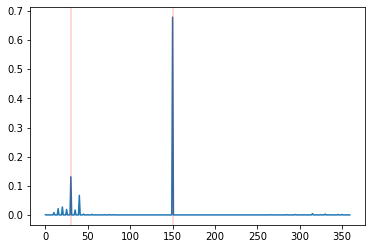

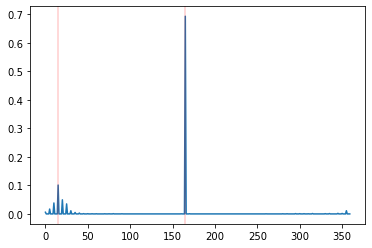

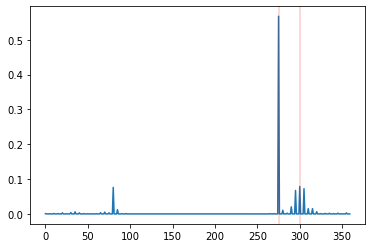

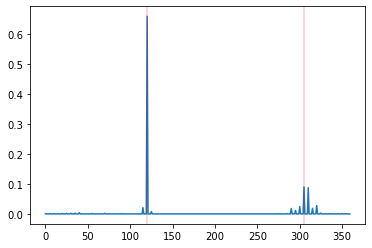

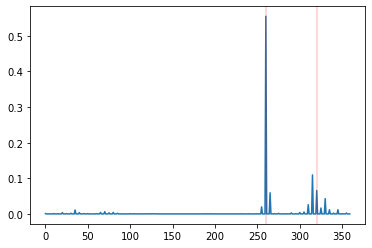

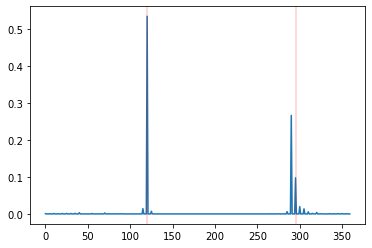

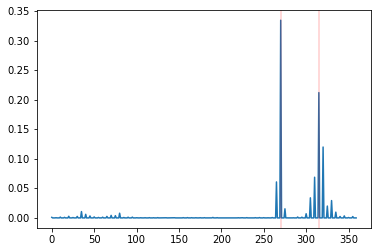

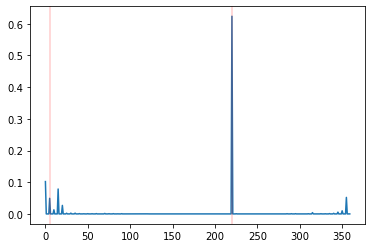

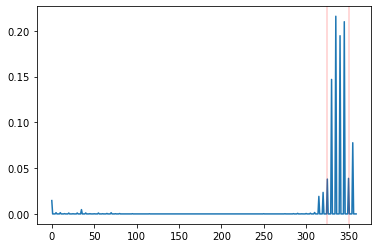

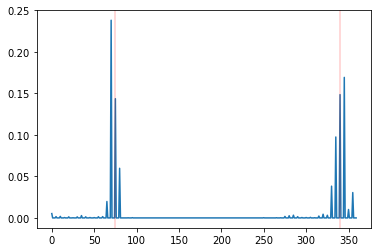

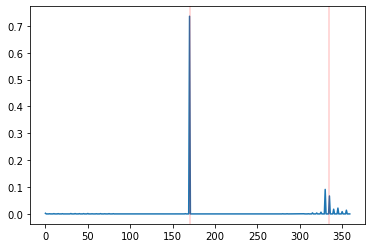

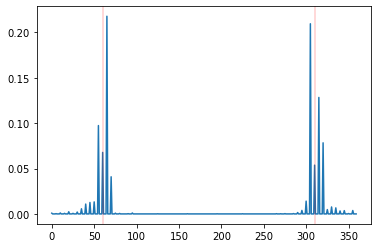

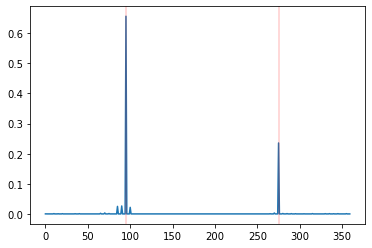

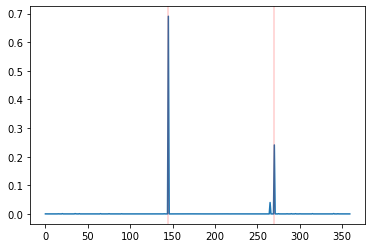

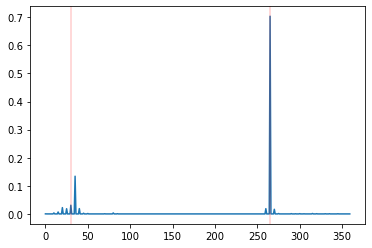

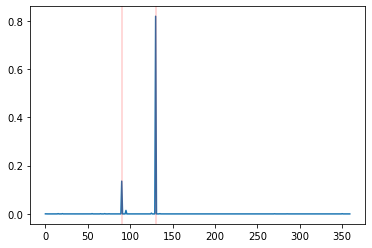

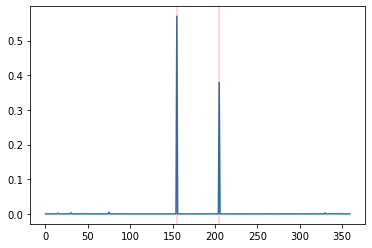

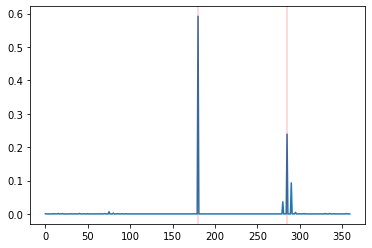

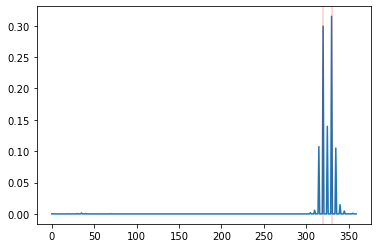

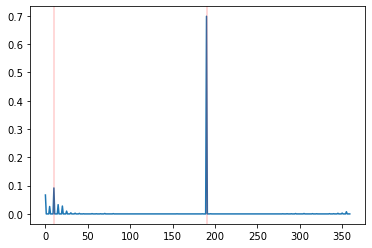

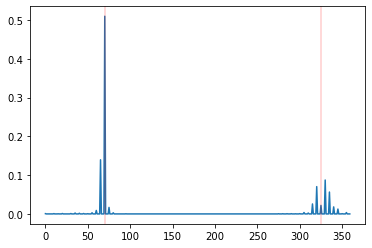

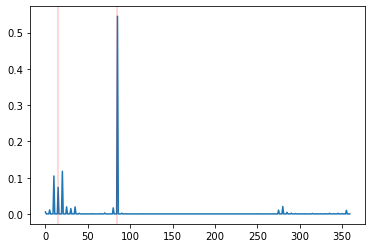

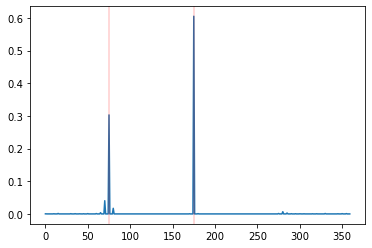

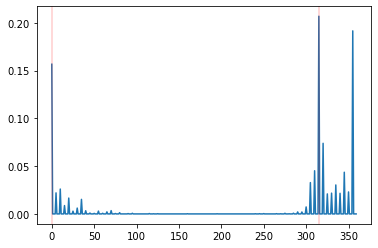

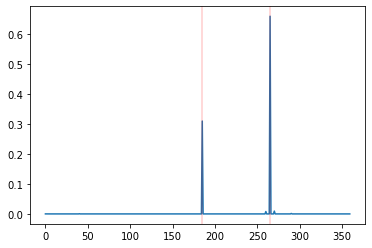

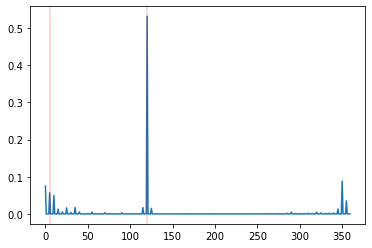

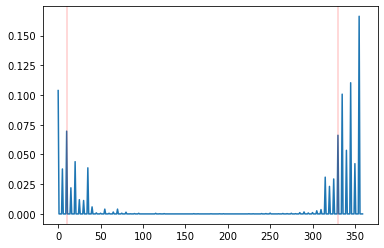

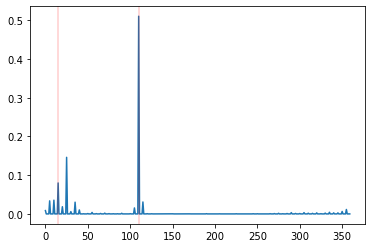

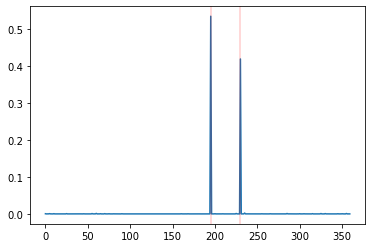

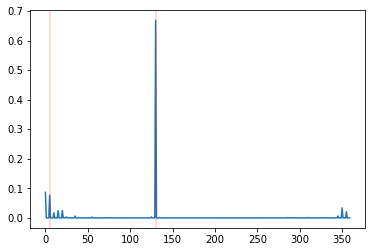

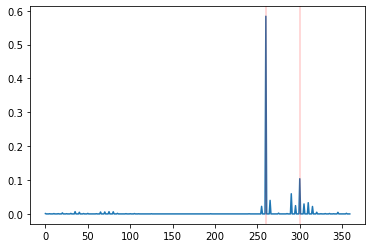

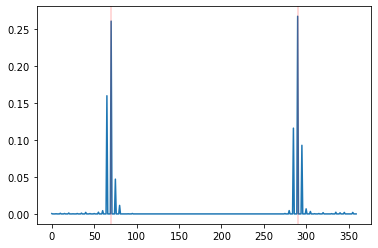

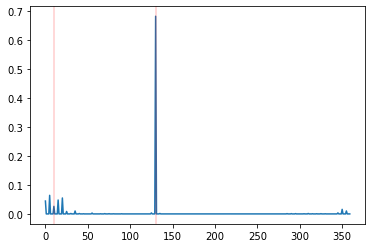

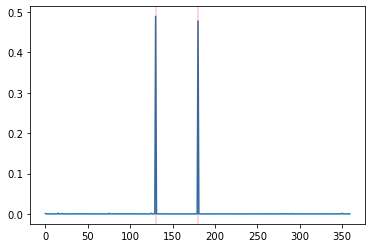

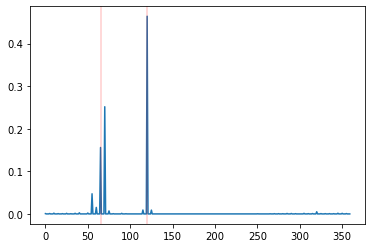

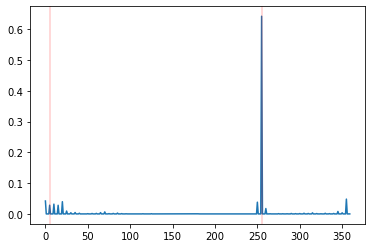

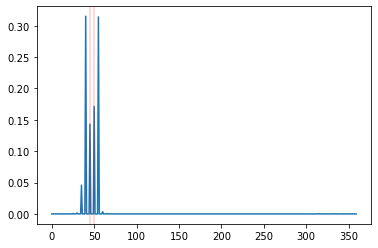

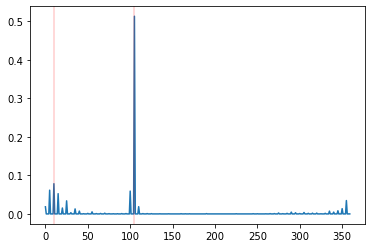

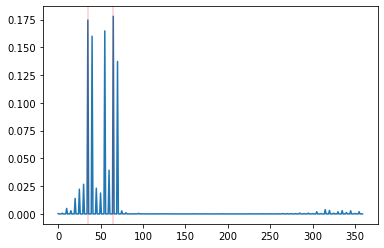

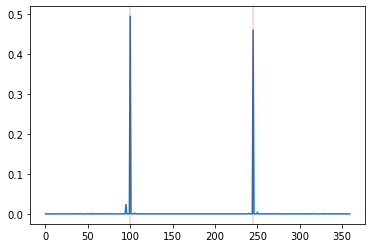

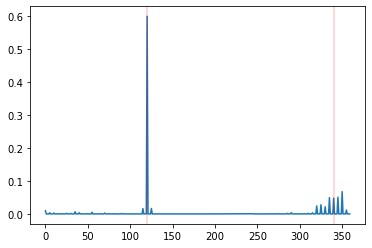

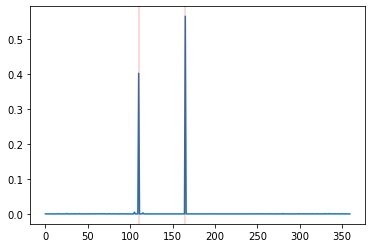

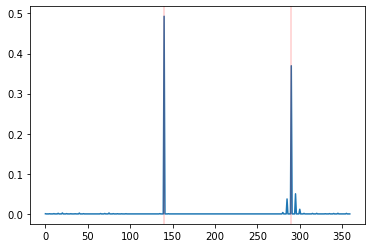

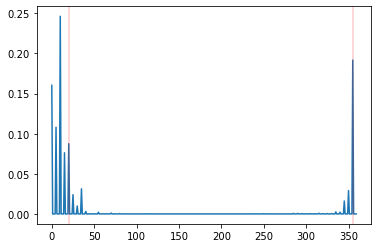

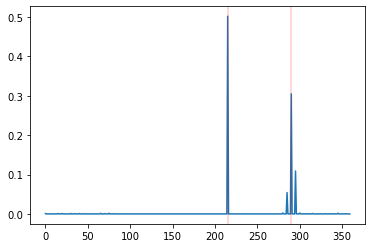

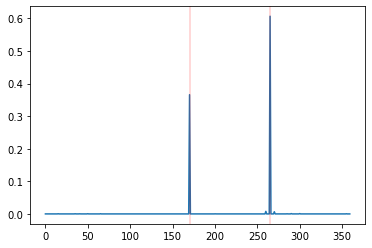

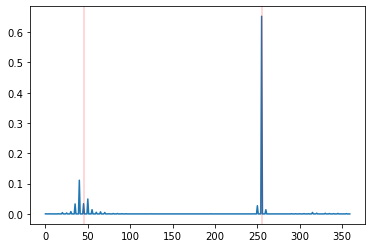

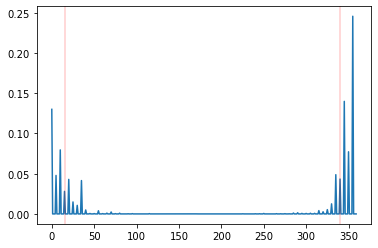

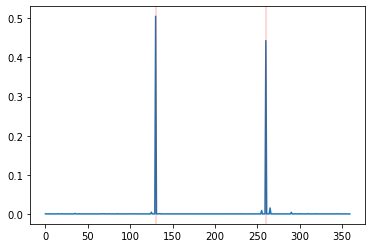

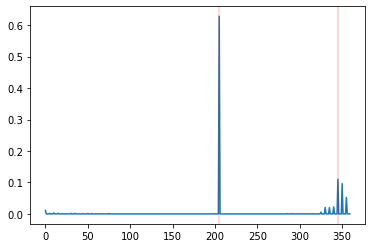

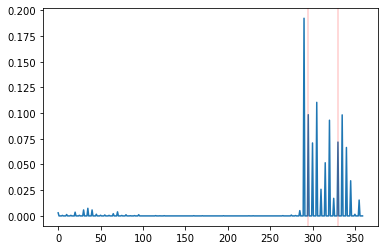

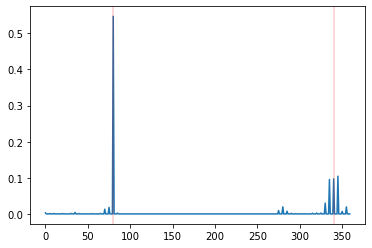

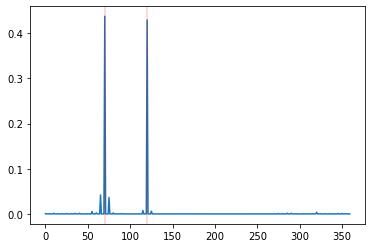

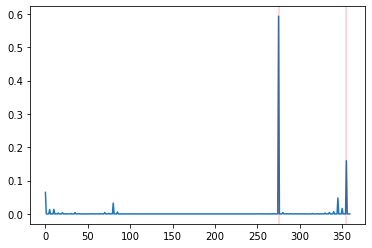

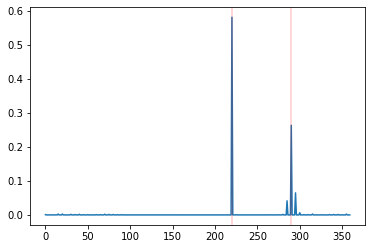

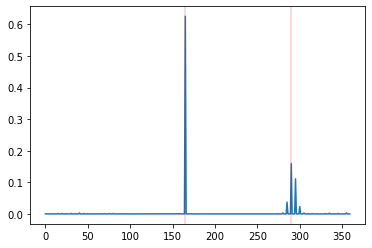

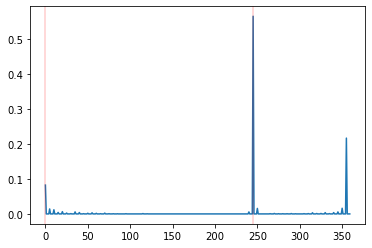

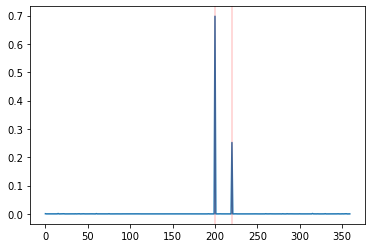

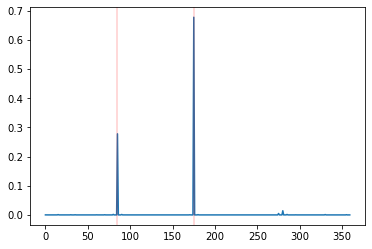

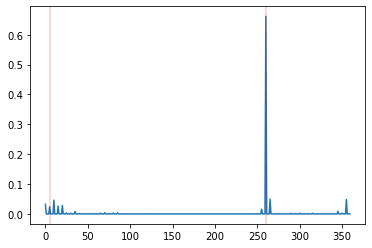

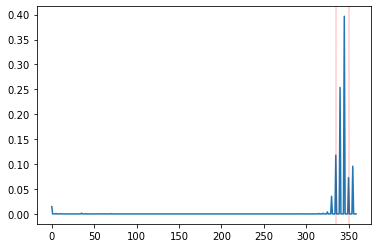

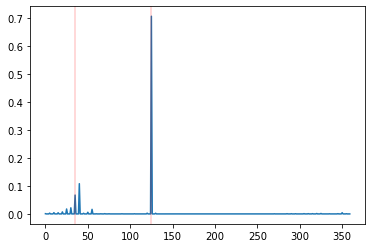

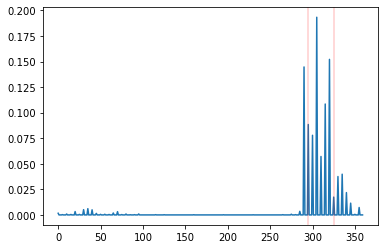

In [82]:
for i in range(100):
    plt.plot(t_pred[i])
    plt.axvline(itr[i][0] * 5, color = "red", alpha = 0.2)
    plt.axvline(itr[i][1] * 5, color = "red", alpha = 0.2)
    plt.show()
    plt.close()

学習に使っていない、1度刻みのデータで検証

In [86]:
dir_name = "data_06" 
theta_s = [i for i in range(360)]
phi = 0

file_names = [str(dir_name)+"/"+str(theta)+","+str(phi)+".csv" for theta in theta_s]

data = [np.array(pd.read_csv(file_name)['dose']).reshape(61,61,150) for file_name in file_names]

data = np.array(data).astype("float32")
data = np.expand_dims(data, axis=4)

In [87]:
label = np.zeros((360,360))
for j in range(360):
    label[j][j] = 0.5

In [88]:
itr = np.random.randint(0, len(data), [100,2])

x_test = np.array([data[i[0]] + data[i[1]] for i in itr])

t_test = np.array([label[i[0]] + label[i[1]] for i in itr])    

In [89]:
t_pred = model.predict(x_test)

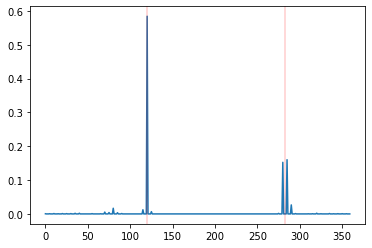

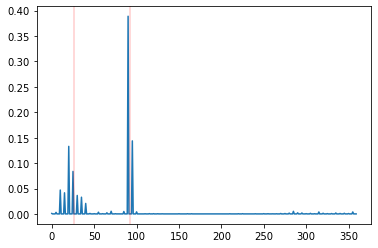

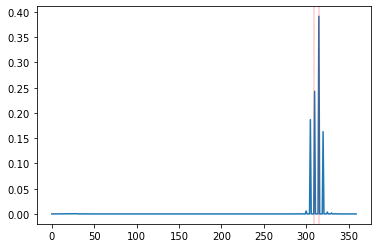

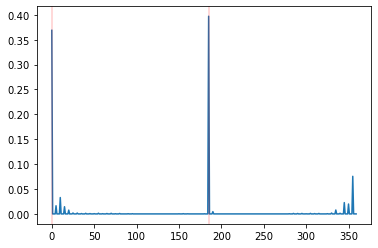

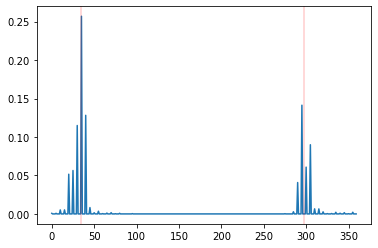

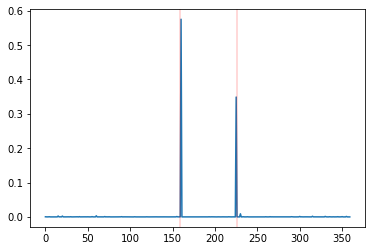

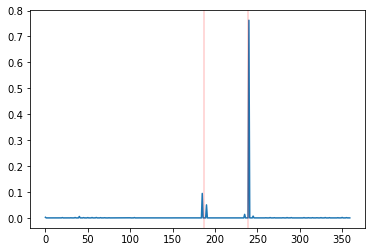

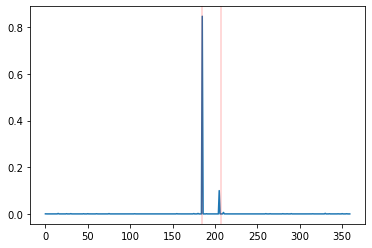

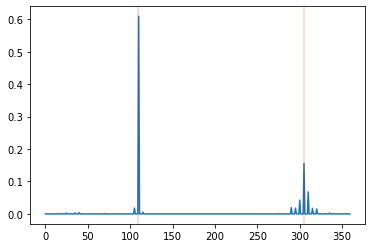

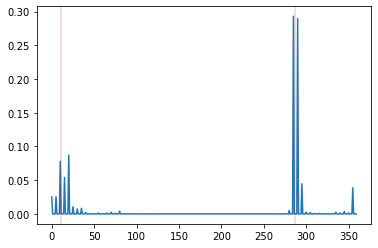

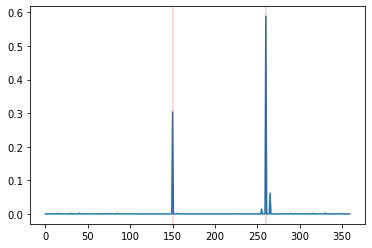

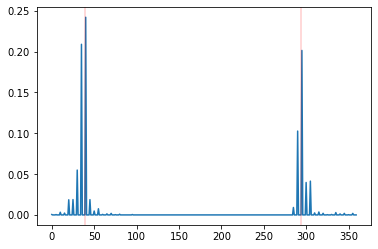

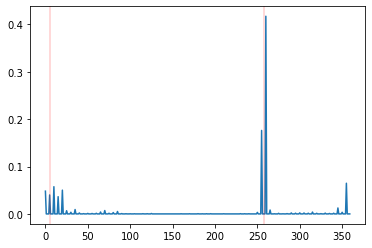

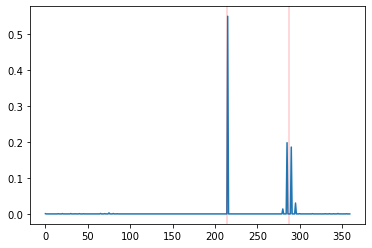

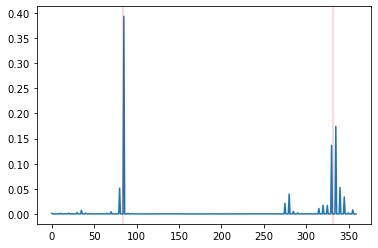

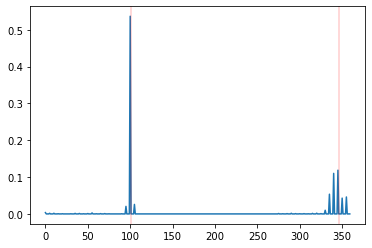

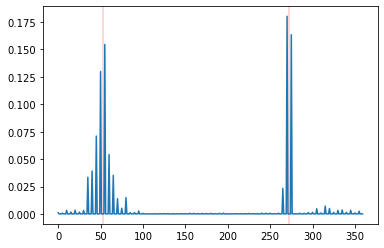

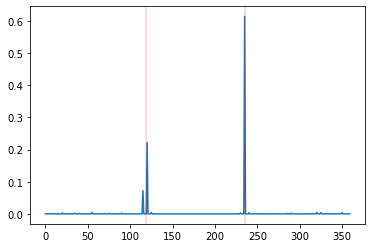

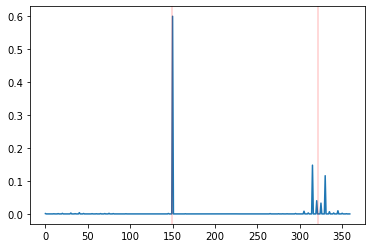

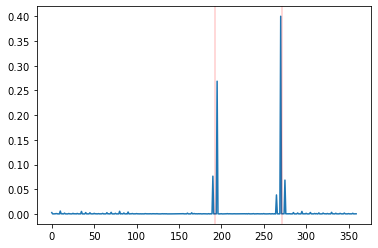

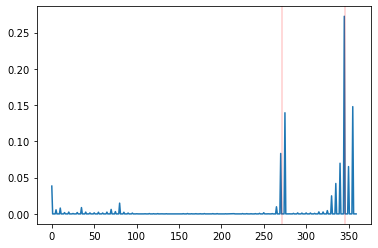

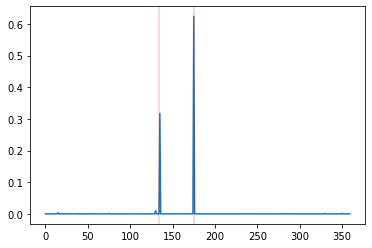

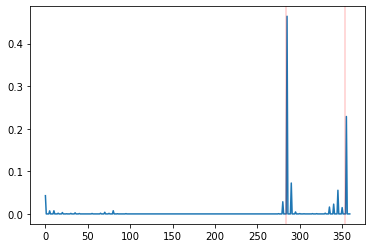

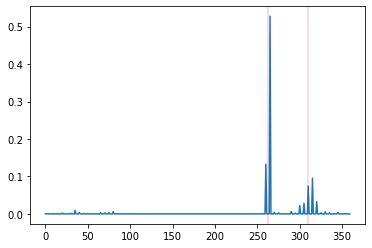

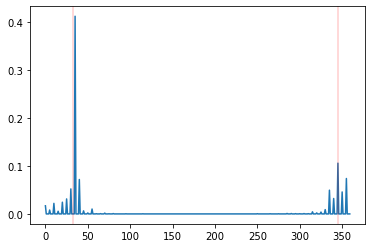

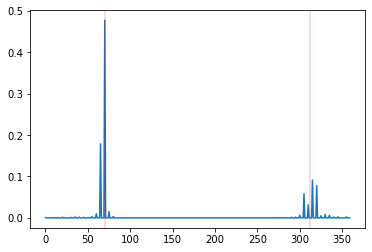

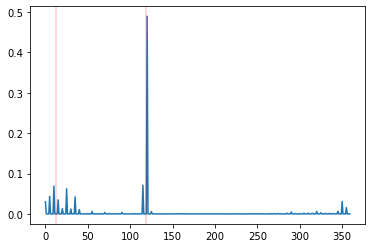

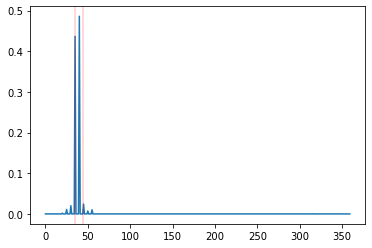

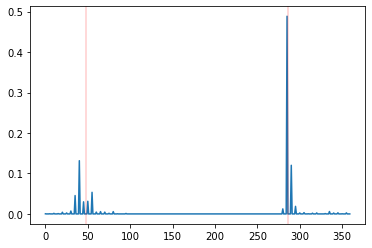

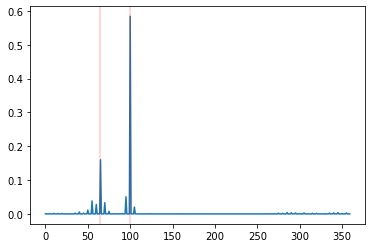

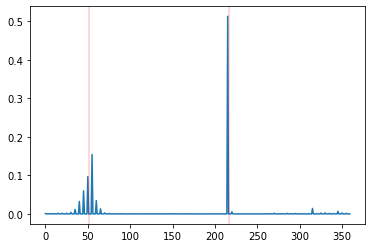

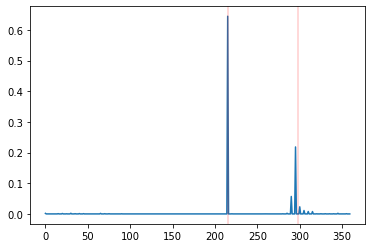

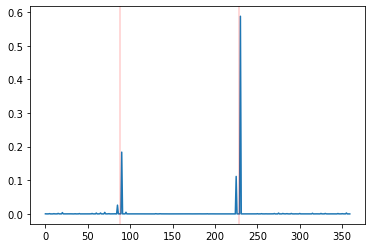

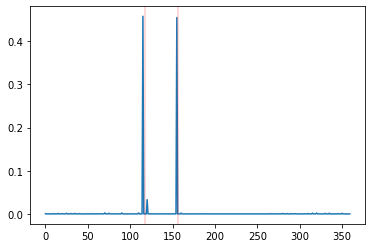

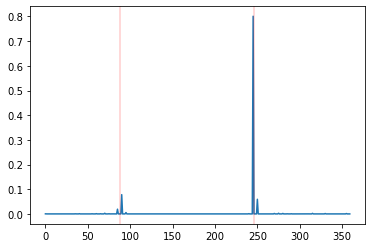

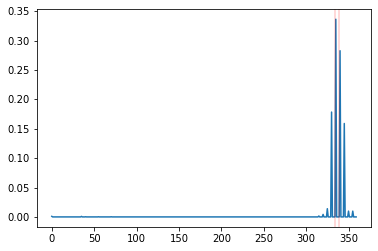

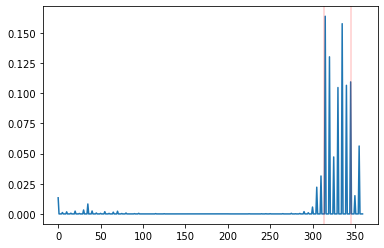

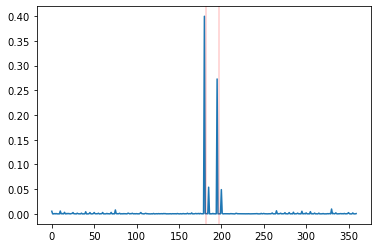

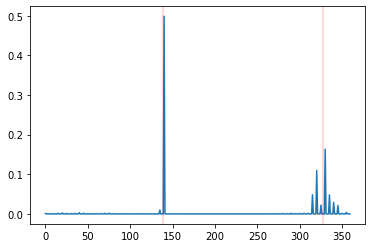

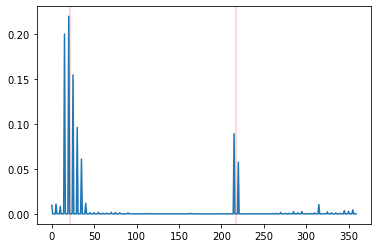

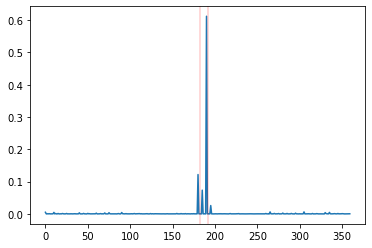

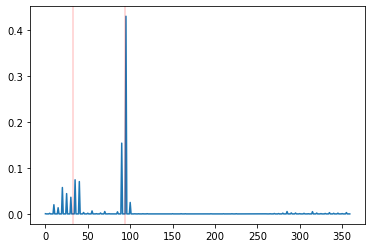

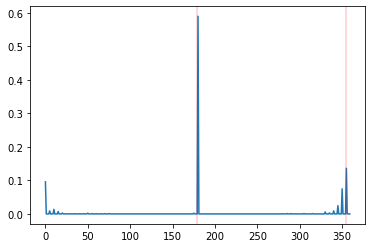

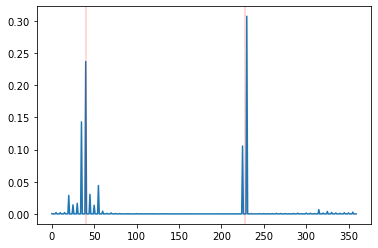

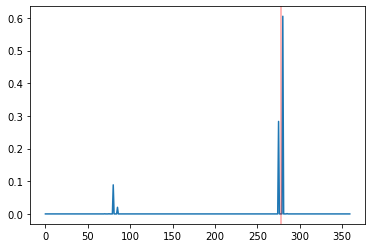

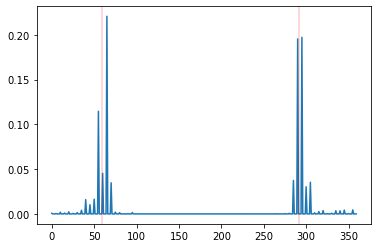

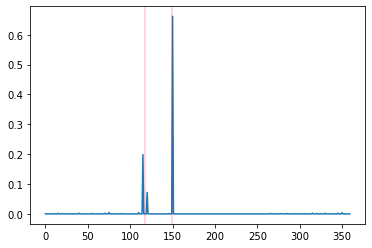

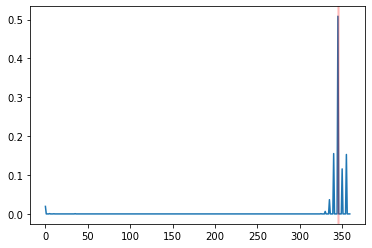

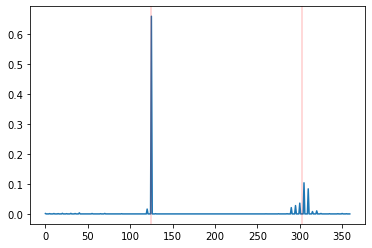

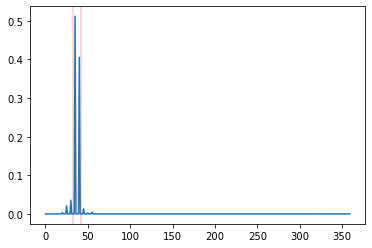

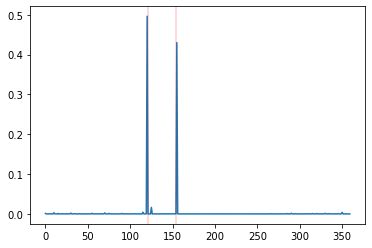

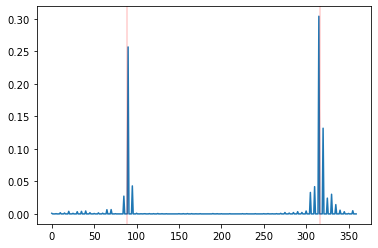

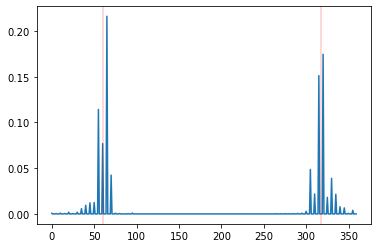

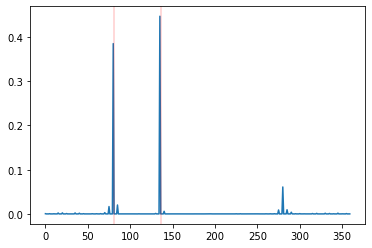

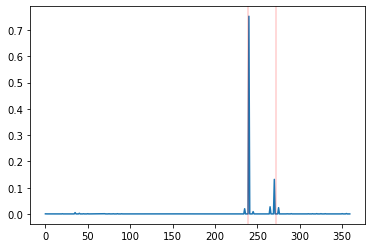

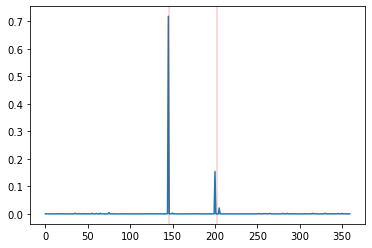

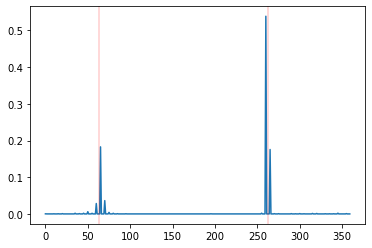

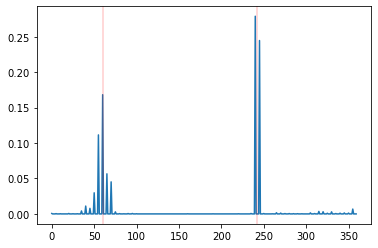

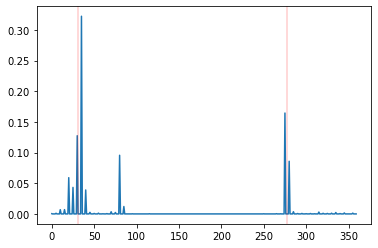

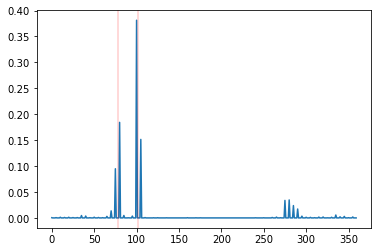

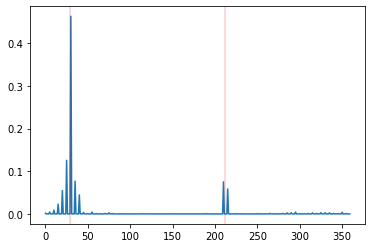

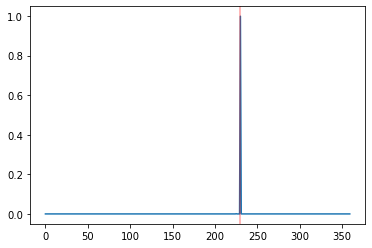

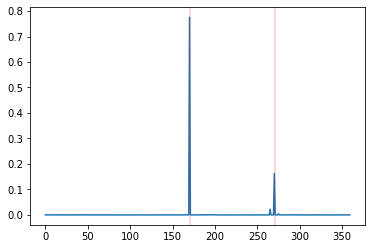

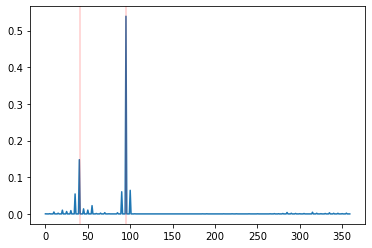

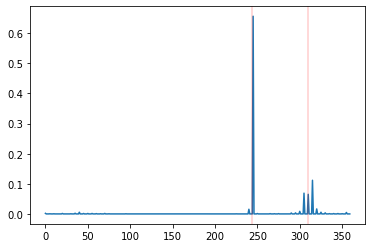

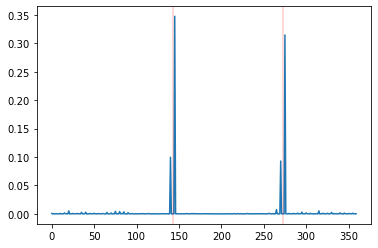

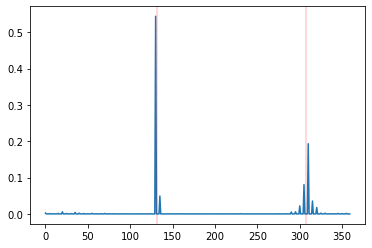

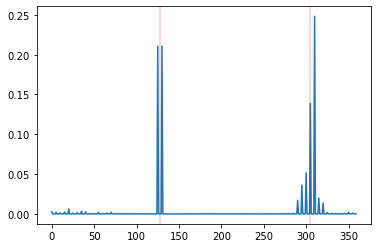

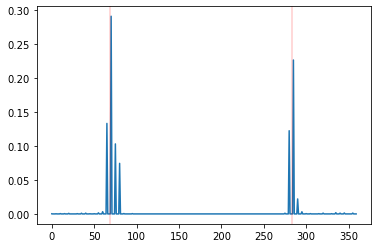

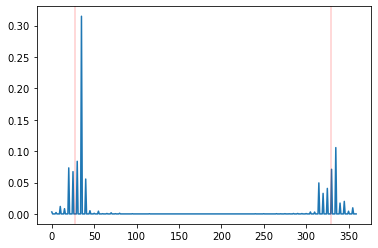

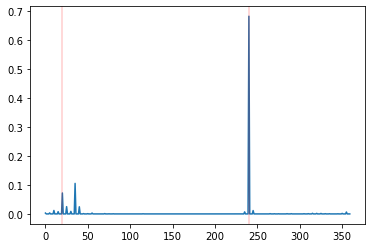

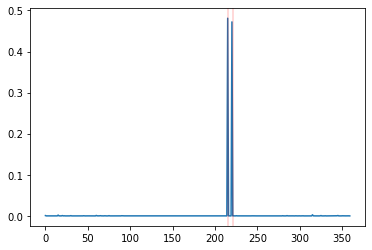

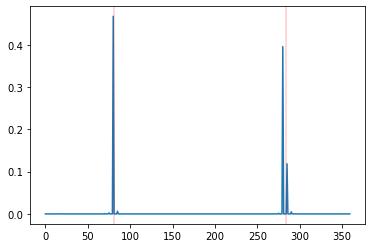

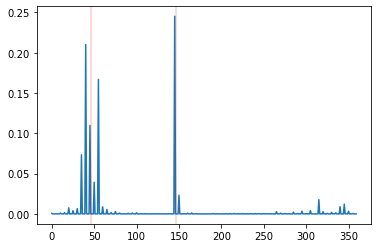

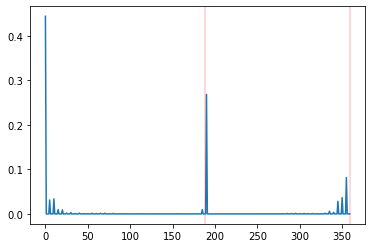

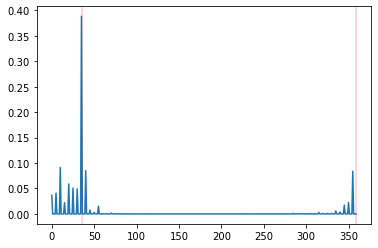

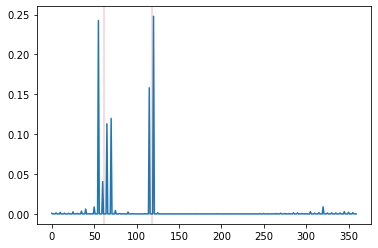

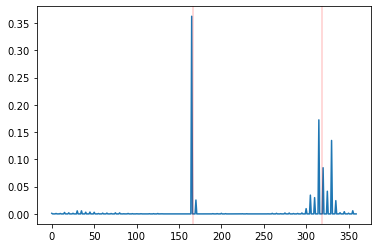

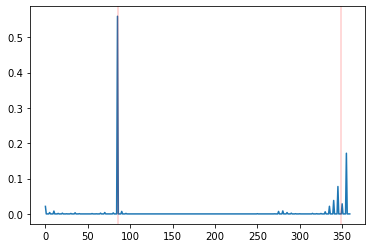

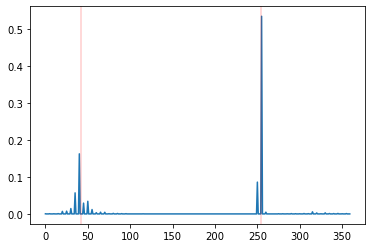

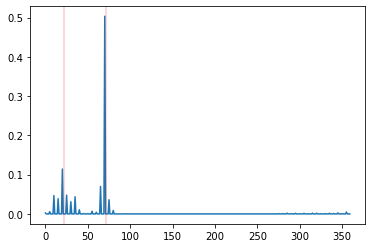

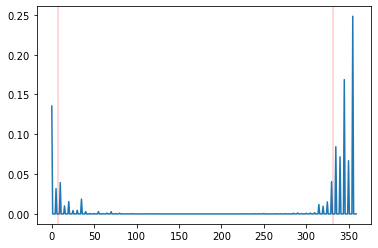

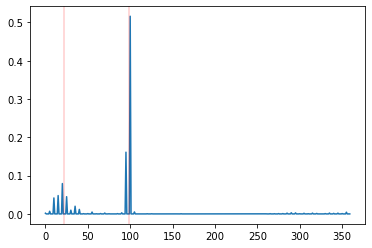

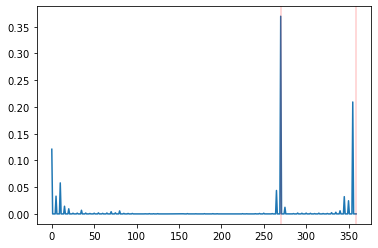

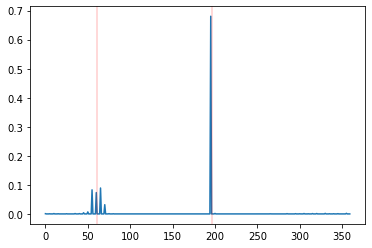

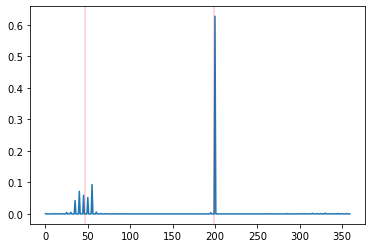

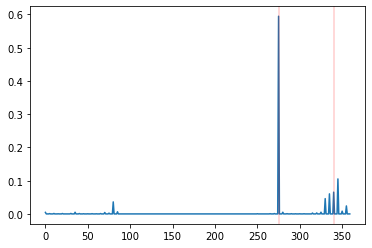

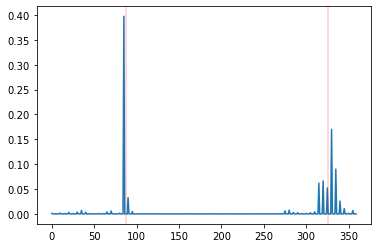

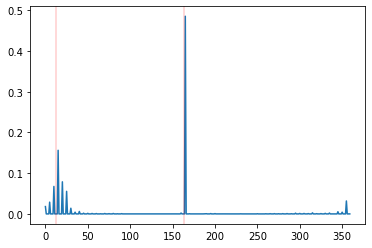

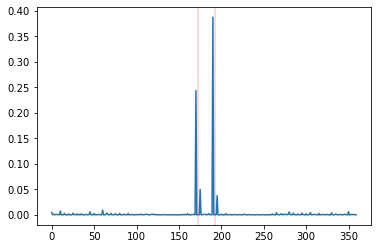

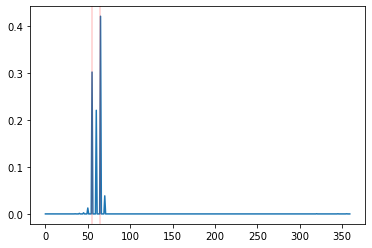

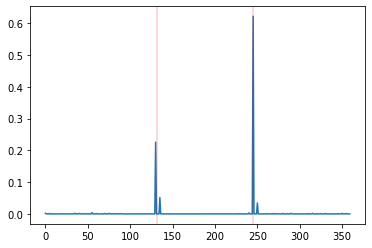

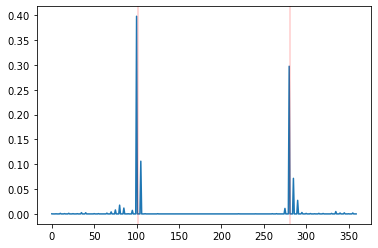

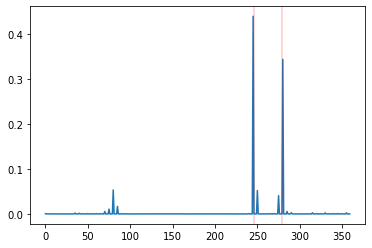

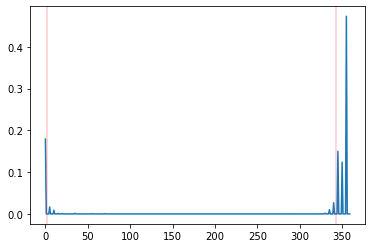

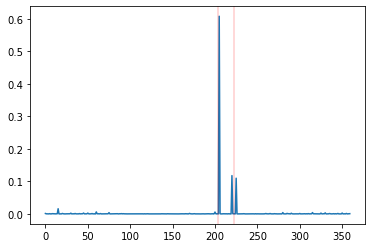

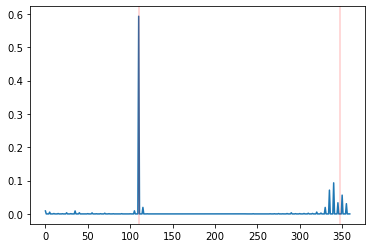

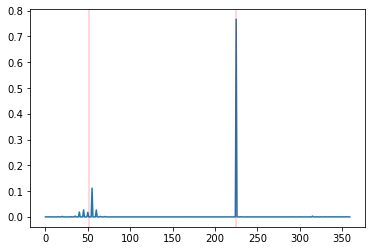

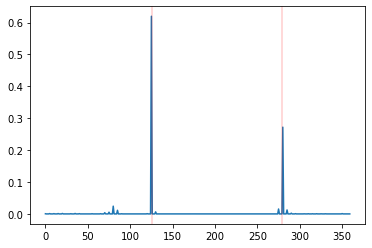

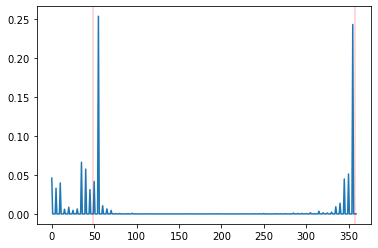

In [91]:
for i in range(100):
    plt.plot(t_pred[i])
    plt.axvline(itr[i][0], color = "red", alpha = 0.2)
    plt.axvline(itr[i][1], color = "red", alpha = 0.2)
    plt.show()
    plt.close()

そもそも、二つ推論する際にこの手法で正解なのか。

例えば、角度を分ける等するのはどうか。

theta_1は$0\leq \theta_1 <180$,theta_2は$180\leq \theta_2<360$など

放射線治療装置では、非常に近い角度で照射することはないのではないかと思う。